# Task 5. Matrix multiplication (matmul)

* Launch all cells of the task, write down (in this markdown) the time ratio (according to cProfile results) between computational times (expended on matmuls based on loops and numpy) explain why cProfile gives faster the same results for numpy code than for loop code.

## Import libraries

In [1]:
import cProfile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def matmul(A, B):    
    C = [[0 for row in range(len(A))] for col in range(len(B[0]))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k]*B[k][j]
    return C


def prepare_A_B(n, m):
    A = np.arange(n * m).reshape(n, m)
    B = 0.1 * A[::-1].T
    return A, B


def repeat_loops(m = 100):
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        matmul(A, B)

        
def repat_numpy(m = 100):    
    for n in range(10, 50):
        A, B = prepare_A_B(n, m)
        np.dot(A, B)

In [4]:
m_given = 100

cProfile.run('repeat_loops(m = ' + str(m_given) + ')' )

         43924 function calls in 9.467 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40    9.460    0.236    9.464    0.237 <ipython-input-3-397387939e50>:1(matmul)
       40    0.001    0.000    0.002    0.000 <ipython-input-3-397387939e50>:10(prepare_A_B)
        1    0.002    0.002    9.467    9.467 <ipython-input-3-397387939e50>:16(repeat_loops)
     1180    0.001    0.000    0.001    0.000 <ipython-input-3-397387939e50>:2(<listcomp>)
        1    0.000    0.000    9.467    9.467 <string>:1(<module>)
        1    0.000    0.000    9.467    9.467 {built-in method builtins.exec}
    42580    0.003    0.000    0.003    0.000 {built-in method builtins.len}
       40    0.000    0.000    0.000    0.000 {built-in method numpy.arange}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}

In [16]:
%timeit repeat_loops()

9.7 s ± 406 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
cProfile.run('repat_numpy(m = ' + str(m_given) + ')' )

         244 function calls in 0.008 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       40    0.000    0.000    0.003    0.000 <__array_function__ internals>:2(dot)
       40    0.003    0.000    0.004    0.000 <ipython-input-3-397387939e50>:10(prepare_A_B)
        1    0.000    0.000    0.008    0.008 <ipython-input-3-397387939e50>:22(repat_numpy)
        1    0.000    0.000    0.008    0.008 <string>:1(<module>)
       40    0.000    0.000    0.000    0.000 multiarray.py:707(dot)
        1    0.000    0.000    0.008    0.008 {built-in method builtins.exec}
       40    0.001    0.000    0.001    0.000 {built-in method numpy.arange}
       40    0.003    0.000    0.003    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       40    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndar

In [24]:
%timeit repat_numpy()

898 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


ratio = 'numpy' / 'loops' = 0.008 / 9.7 = 0.00082
Loops work very unefficient in Python. Numpy operations optimised musch better.

# Task 6 Advanced specgram

## Run assistive plot functions

In [7]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)

In [94]:
def my_imshow(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)

## Generate the signal
* E.g., signal consits of wave packets of three harmonic signals

In [58]:
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*pi, 20*2*pi, n_timestamps)
    y=np.sin(t)*exp(-t**2/2/20**2)               #generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)  #add      second wave packets of harmonic signal
    y=y+np.sin(5*t)*exp(-(t-10*2*pi)**2/2/10**2) #add      third  wave packets of harmonic signal
    return t, y

In [59]:
t, y = form_signal()

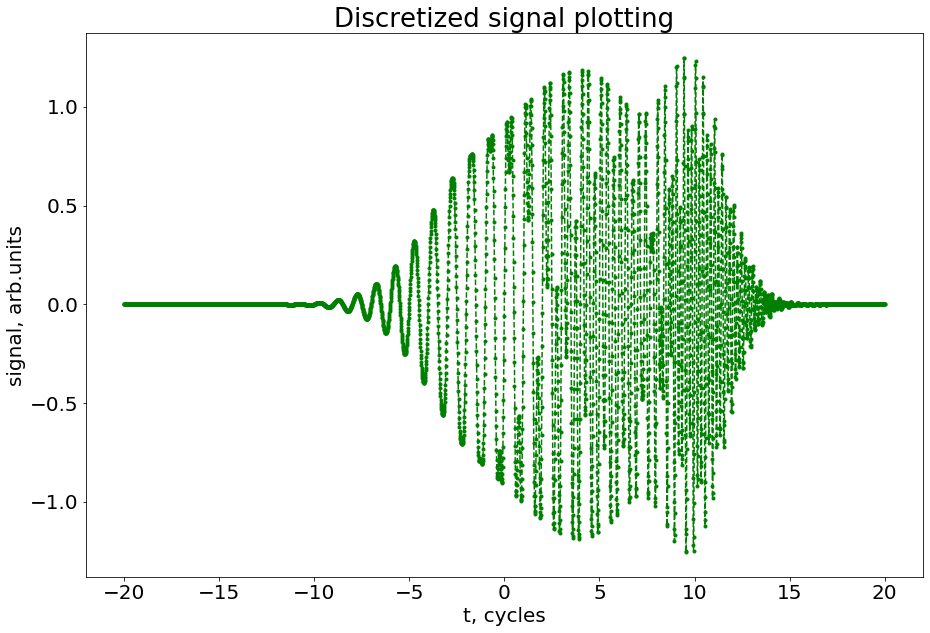

In [60]:
my_plot(t / 2 / pi, y, title = "Discretized signal plotting", xlabel = 't, cycles', ylabel = 'signal, arb.units')
plt.show()

## Amplitude-Frequency Power (AFP) characteristic

* <b> AFP </b> provides us with information about <strong>amplitudes </strong> of separated <strong> harmonic </strong> signals (spectral analysis) 
* <b> AFP </b> does <strong>not </strong> give information about the frequency and amplitude depence <strong> on time </strong>.

### Explain, why the "hats" of signal and AFP may be sharp

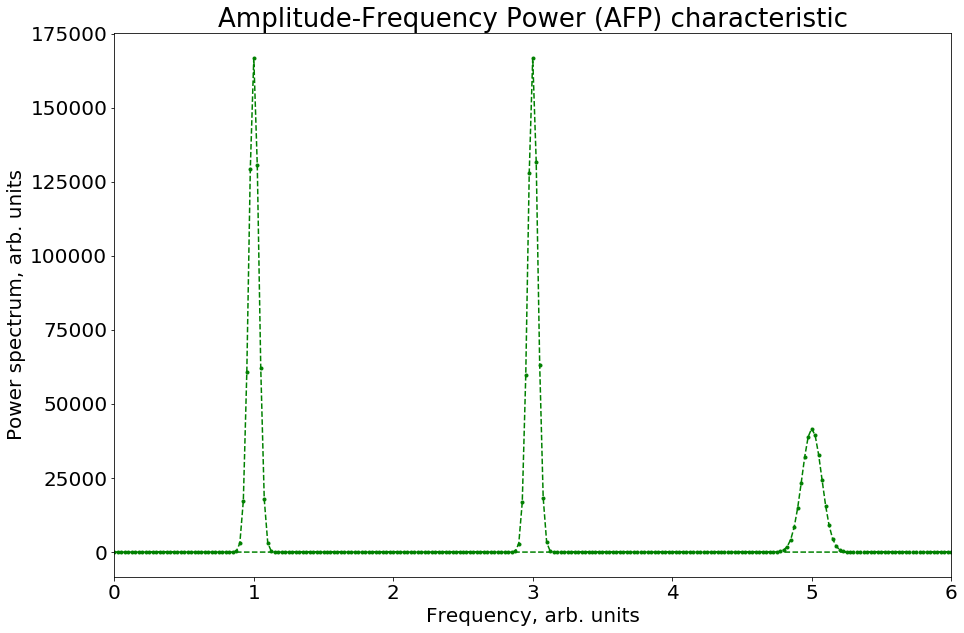

In [61]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title = "Amplitude-Frequency Power (AFP) characteristic", xlabel = 'Frequency, arb. units', ylabel = 'Power spectrum, arb. units')
plt.xlim(0, 6)
plt.show()

## Applicate short-time Fourier transform (STFT)
* <b> STFT </b> provides us with information about the frequency and amplitude depence <strong> on time </strong> (specgram).
* vary $\operatorname{kappa} = \overline{0.1, \,10}$, write down results into gif (add in title of picture values of kappa), and explain, why specgram is different.

In [62]:
def window_function(t, window_position, window_width):
    return exp(- (t - window_position) ** 2 / 2 / window_width ** 2)


def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20 * 2 * pi, 20 * 2 * pi, nwindowsteps)

    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window=y * window_function(t, t_window_position, window_width)
        #plot(y_window)
        specgram[:,i]=abs(fft.fft(y_window))

    return specgram


def repeat_function(window_width, nwindowsteps = 1000, repetitions = 100):
    for _ in range(repetitions):
        get_specgram(window_width = window_width, 
                     nwindowsteps = nwindowsteps)

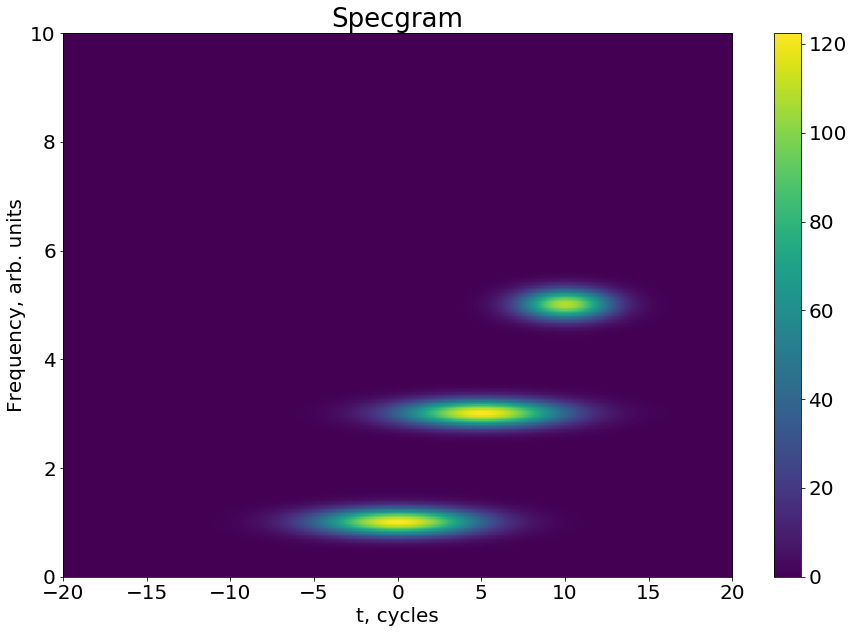

In [95]:
kappa = 1
window_width_given = kappa * 2 * pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Specgram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

In [97]:
def my_imsave(x, y, z, 
              title, 
              xlabel, 
              ylabel,
              k,
              grid_active = False, fig_x_size = 15, fig_y_size = 10, font_param = 20):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', 
               origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2 * w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize = font_param * 1.3)
    plt.xlabel(xlabel, fontsize = font_param)
    plt.ylabel(ylabel, fontsize = font_param)
    plt.xticks(fontsize = font_param)
    plt.yticks(fontsize = font_param)
    plt.grid(grid_active)
    plt.text(0, 9, 'kappa: ' + str(k), fontsize=20, color='red')
    plt.ylim(0, 10)
    plt.savefig('spectrogram') # Overwrite image each time

In [33]:
import imageio

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


CPU times: user 2min 44s, sys: 2.27 s, total: 2min 46s
Wall time: 45.9 s


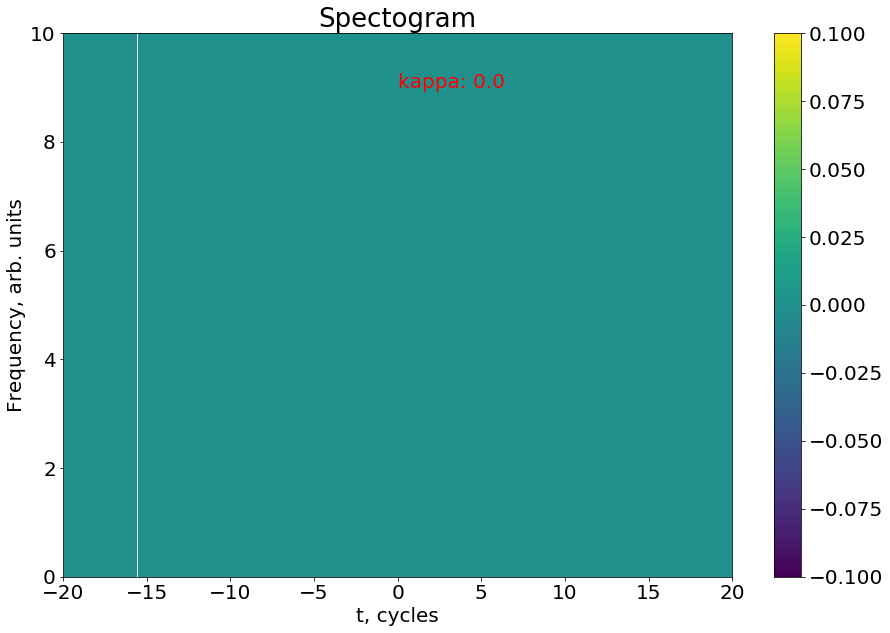

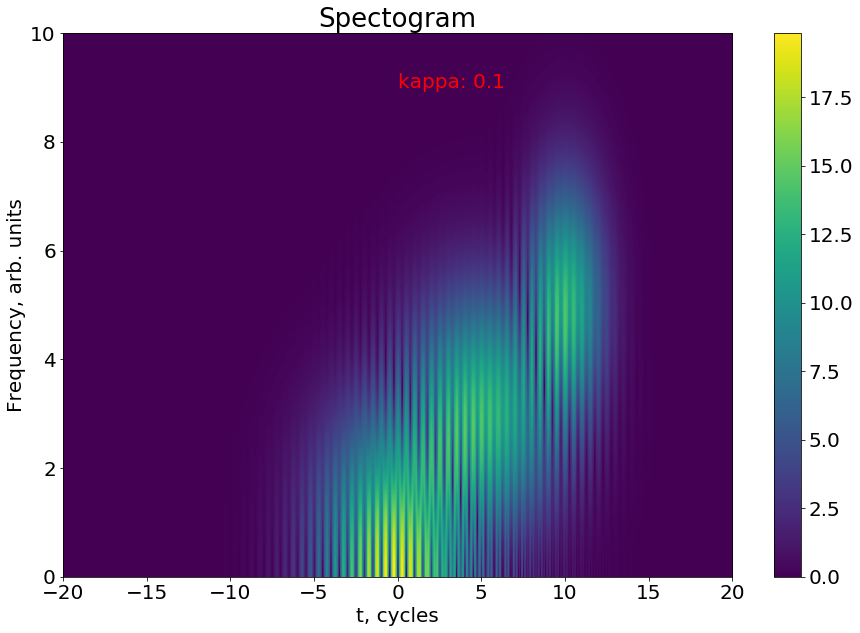

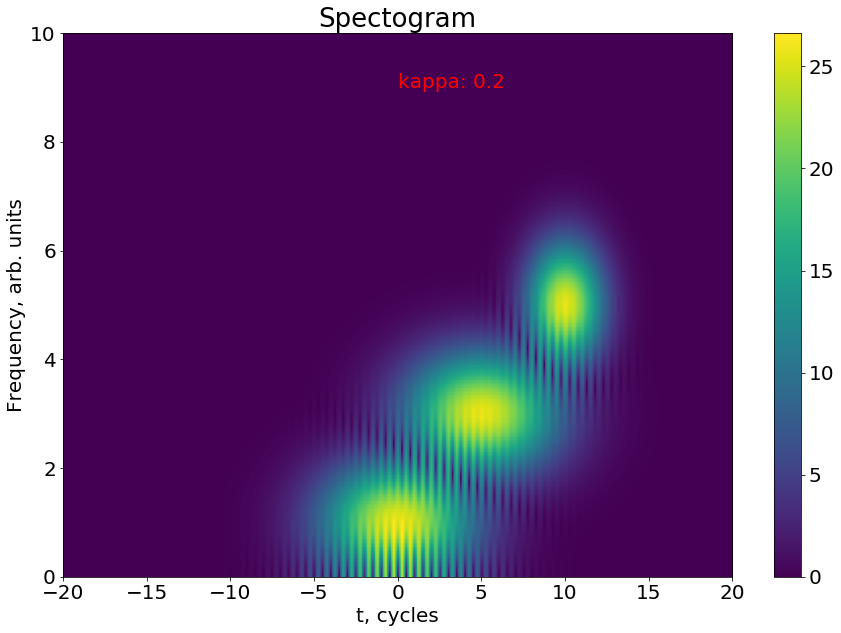

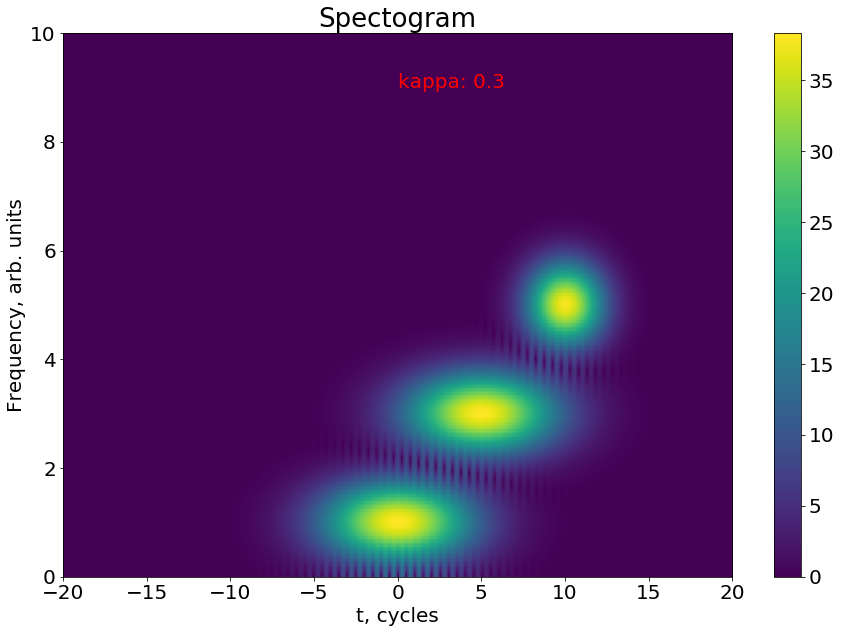

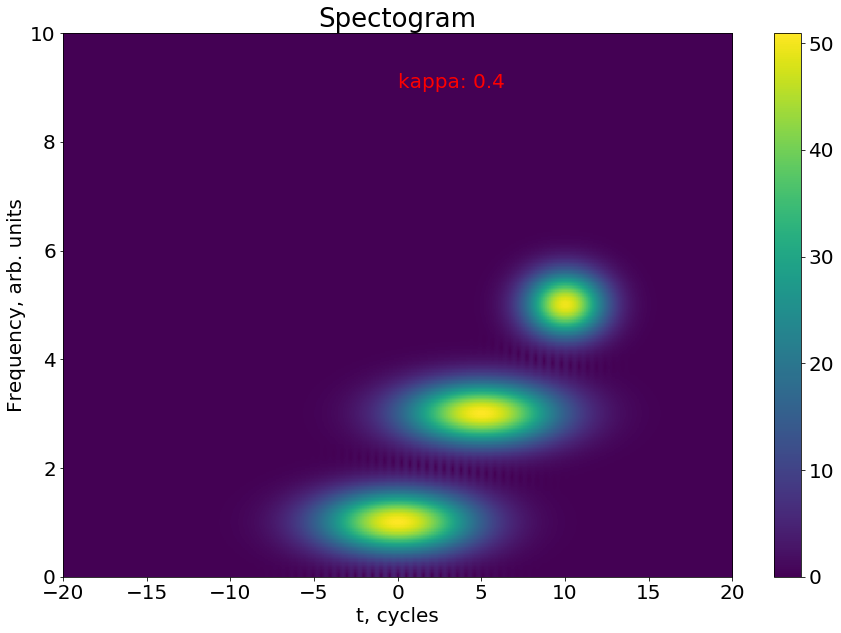

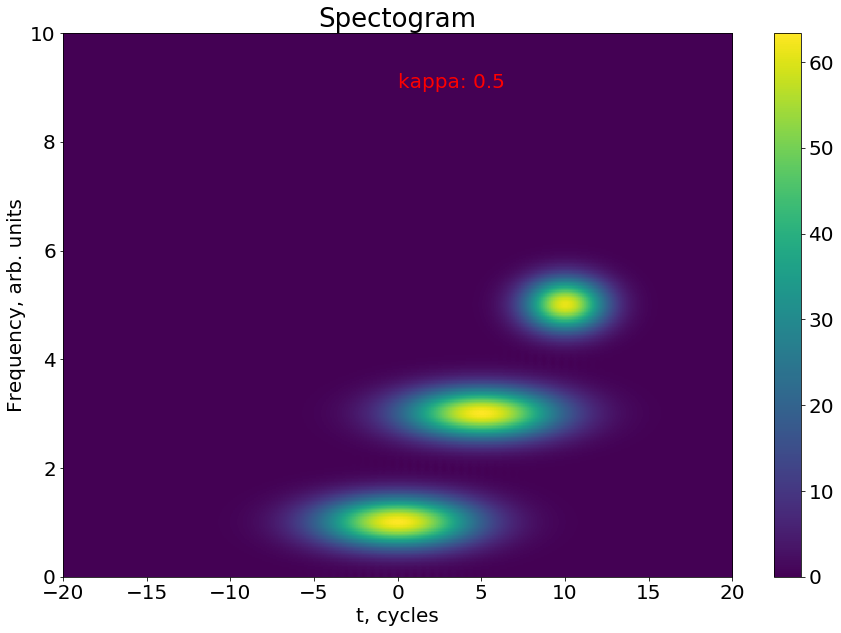

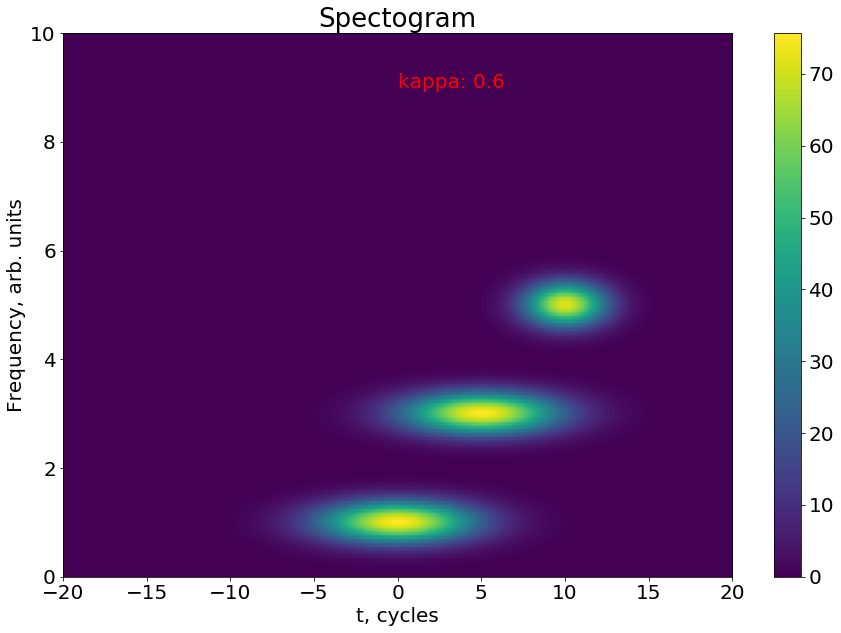

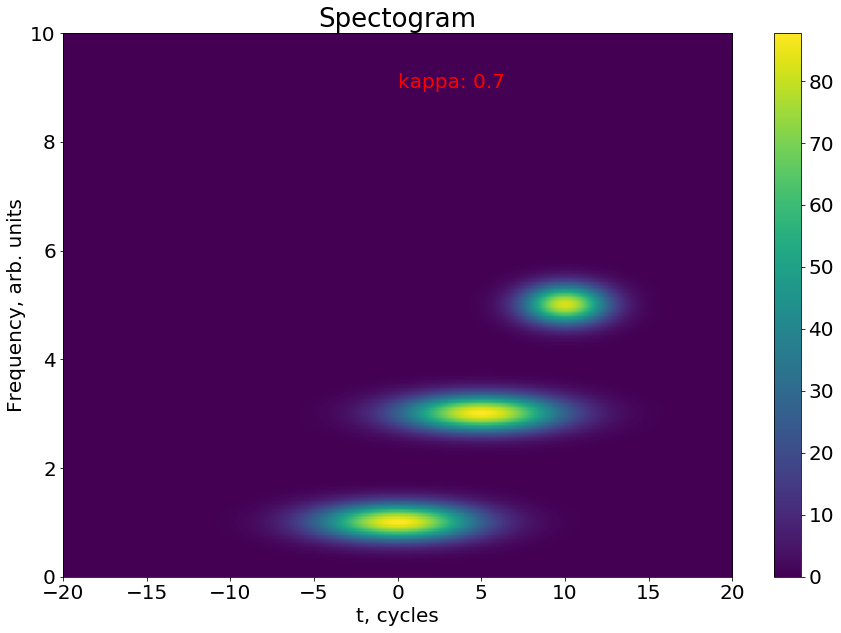

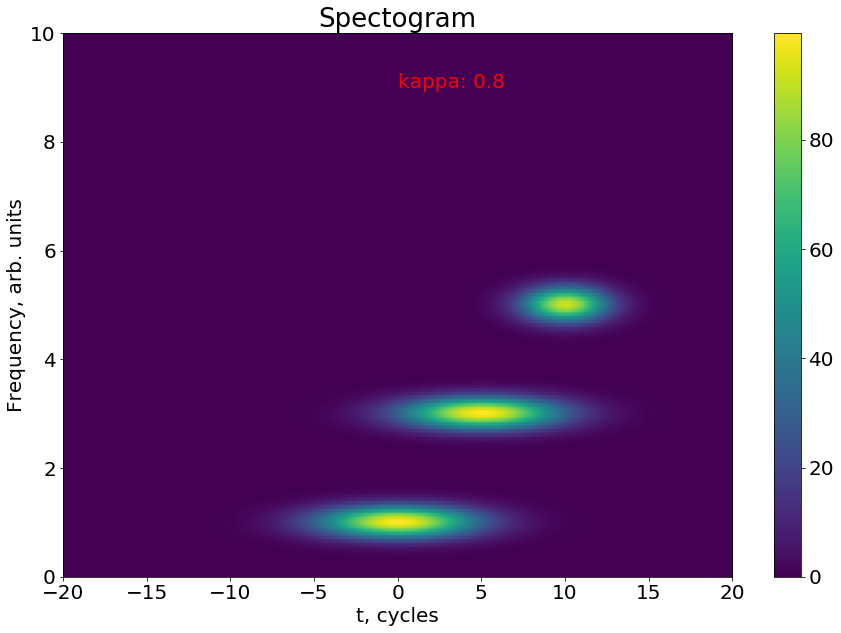

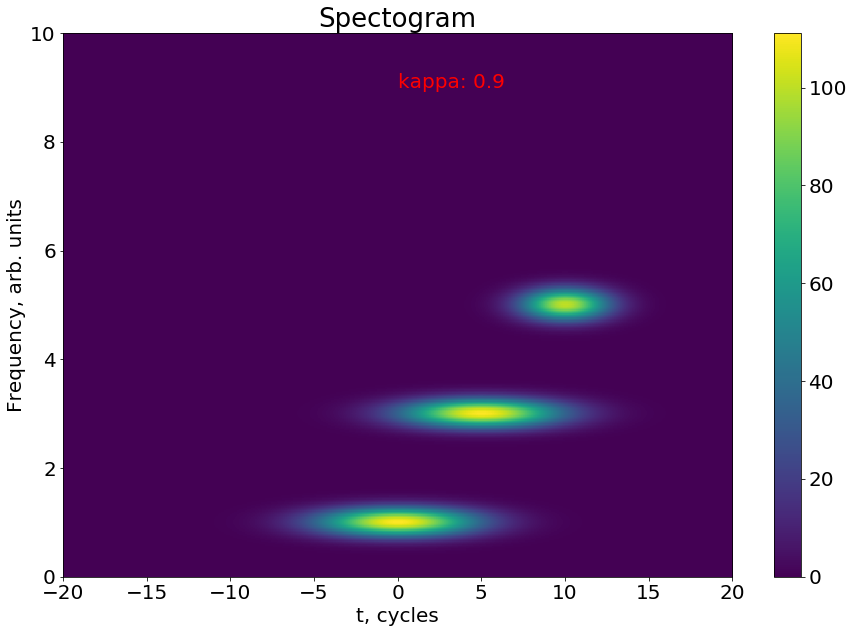

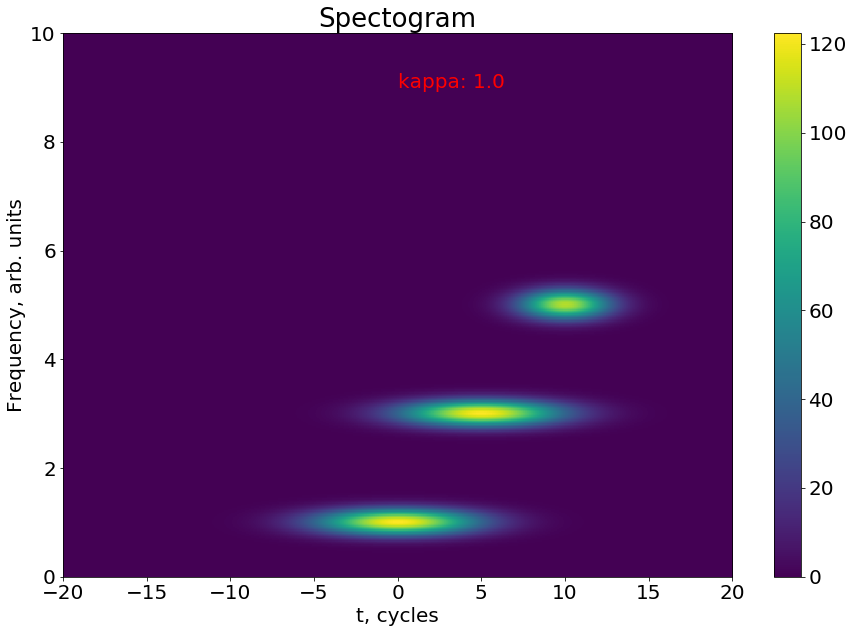

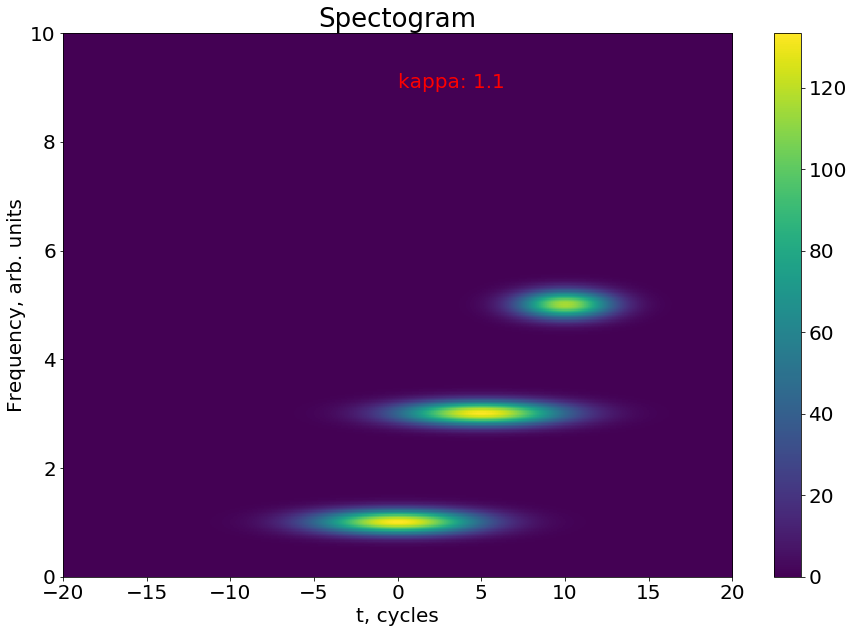

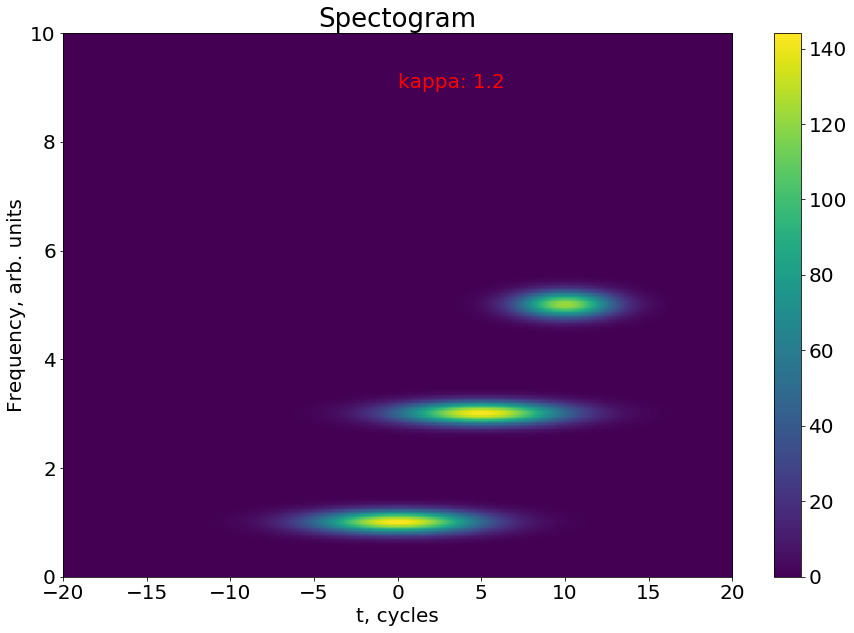

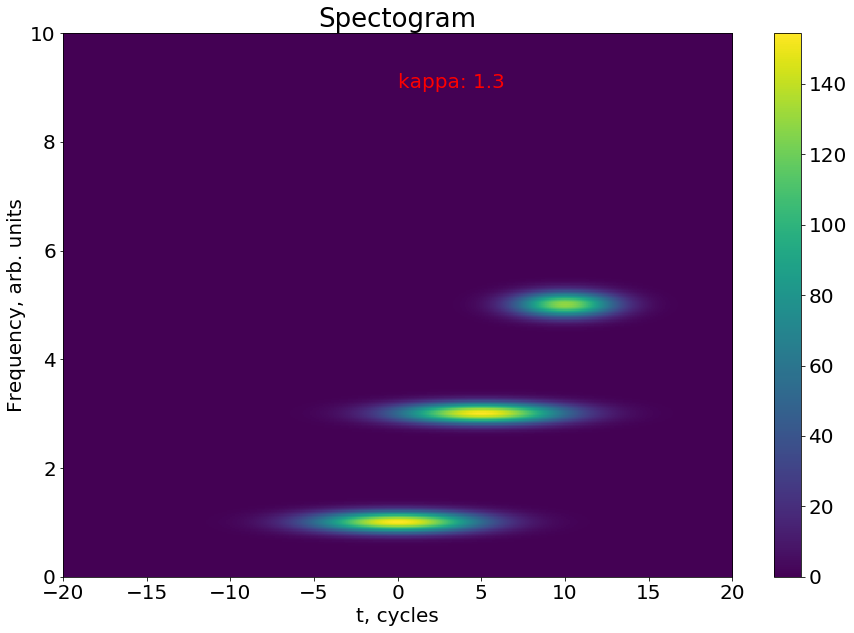

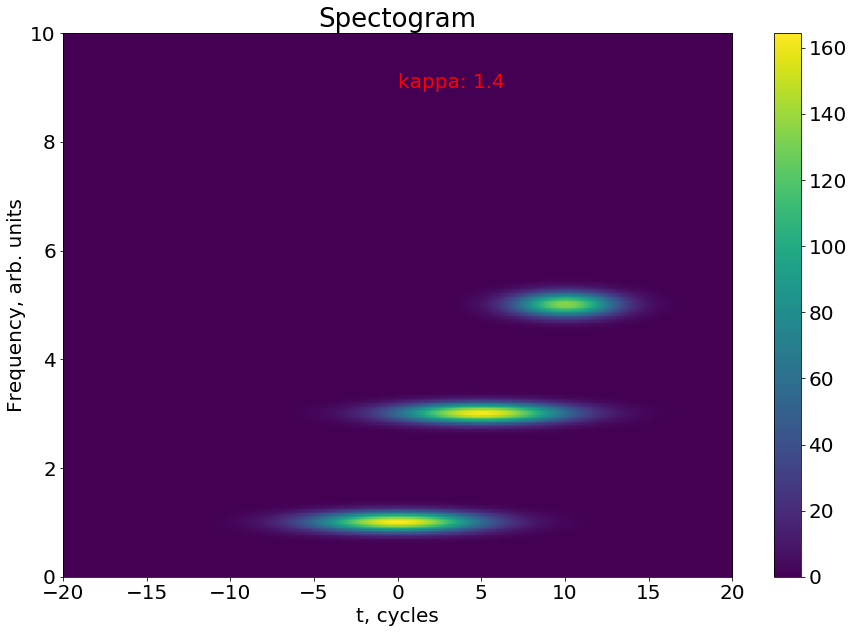

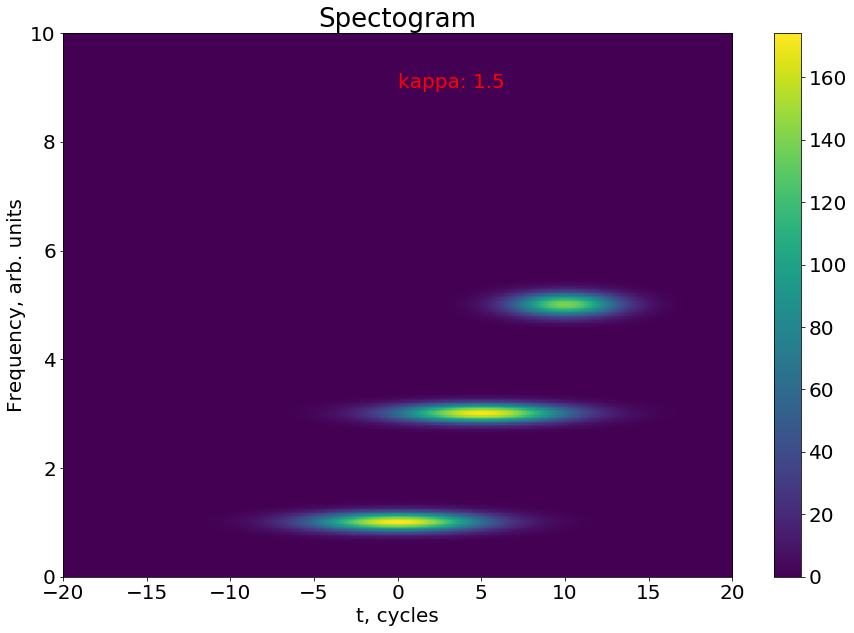

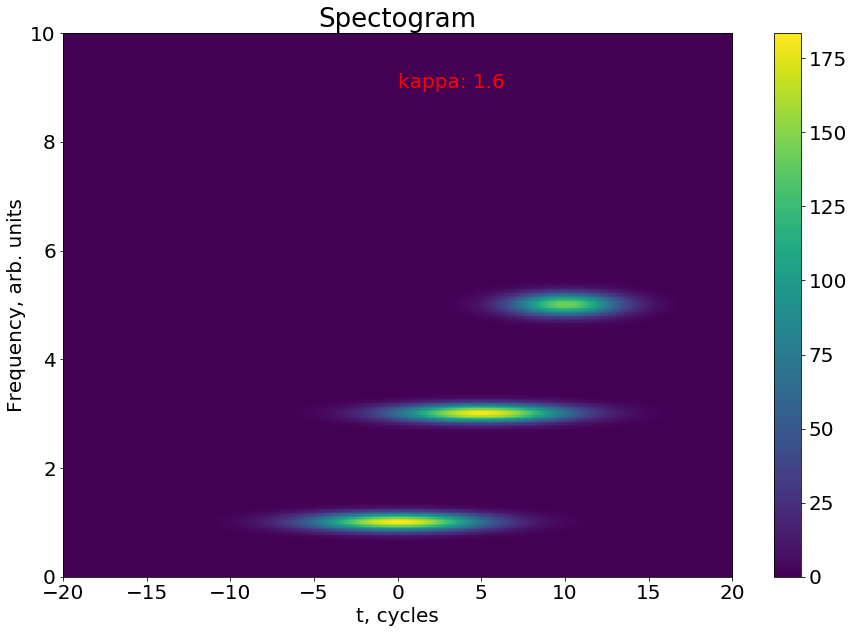

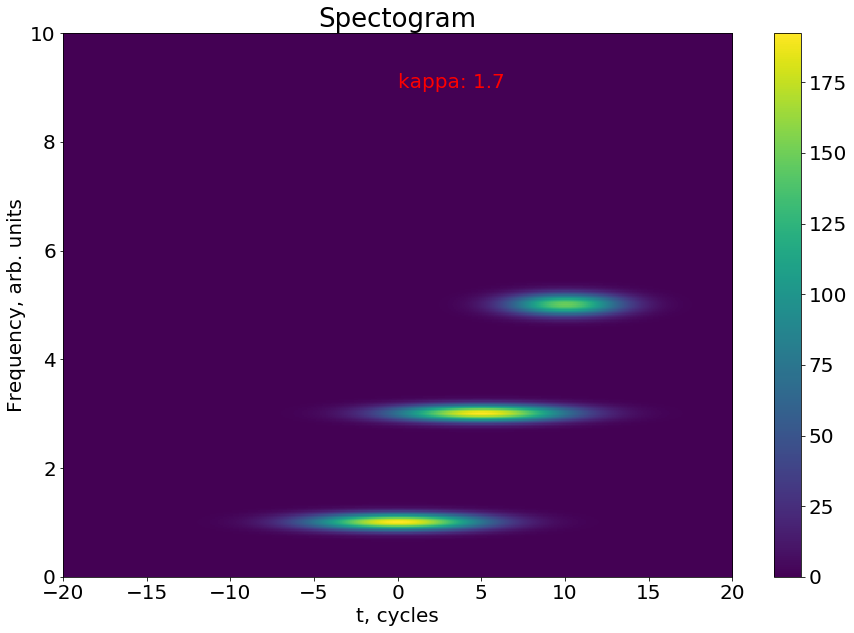

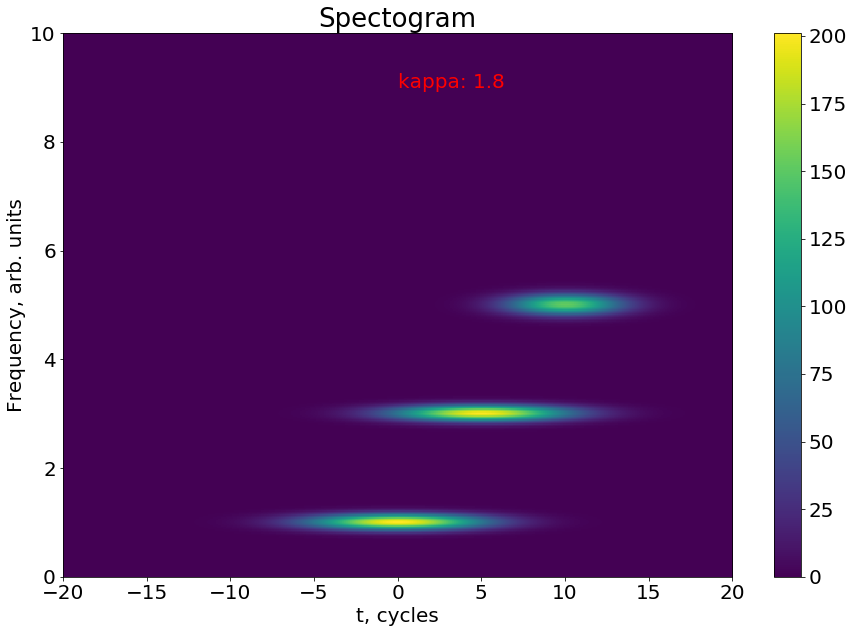

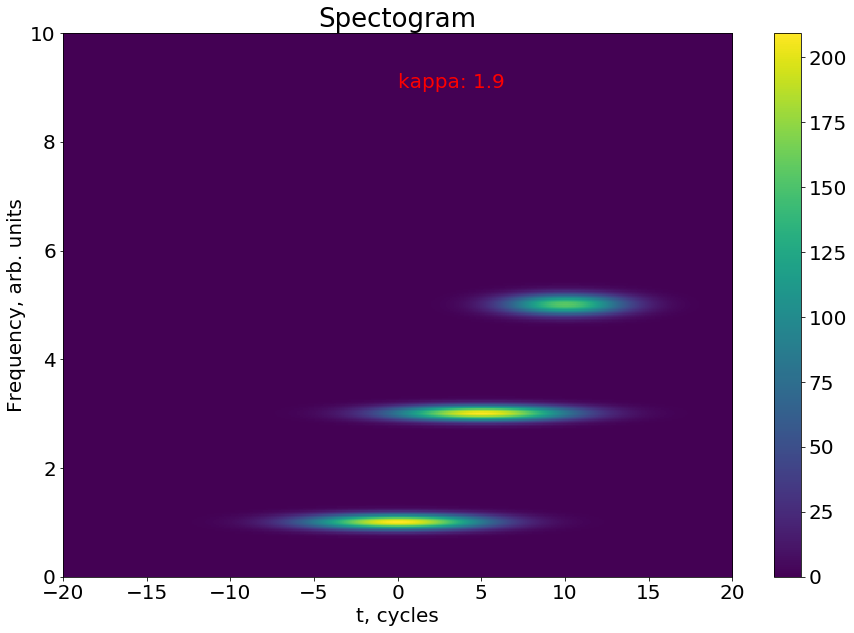

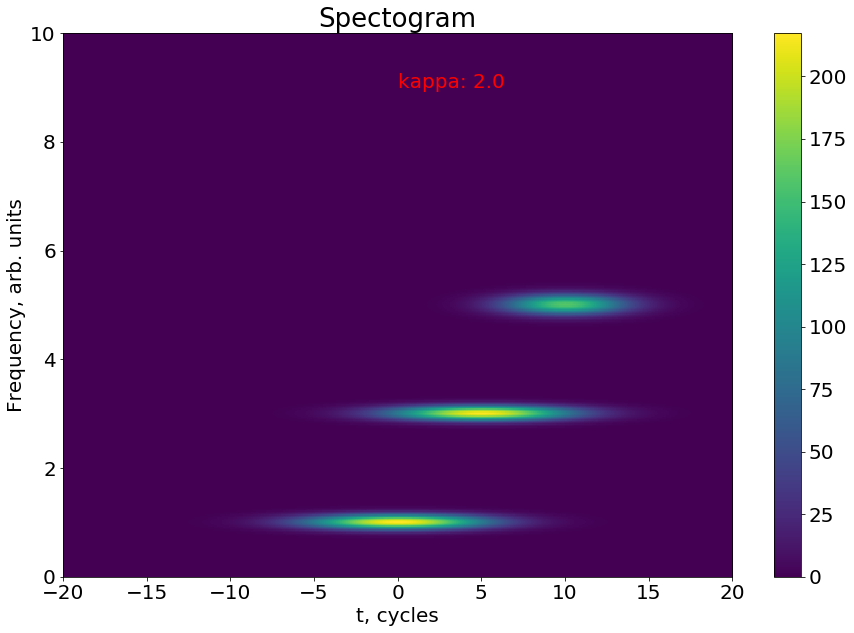

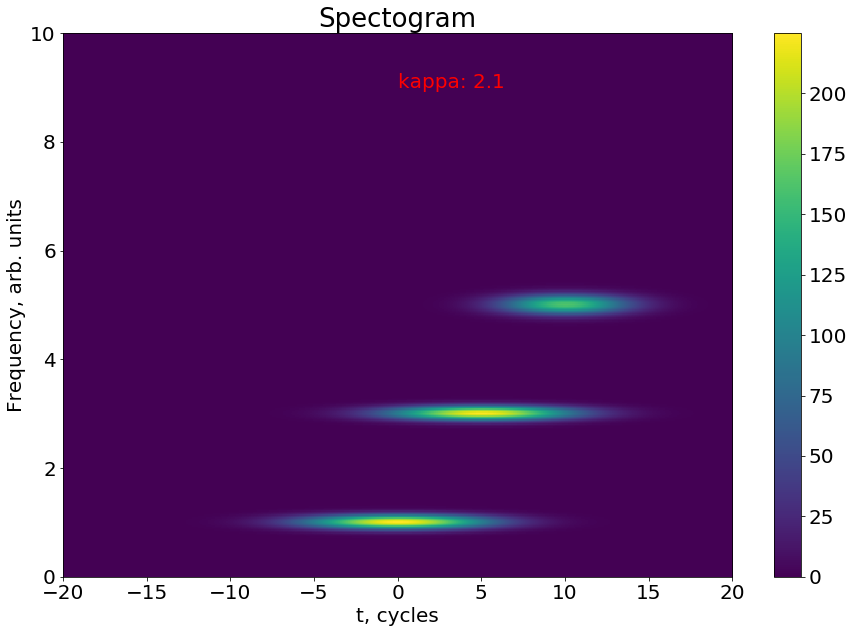

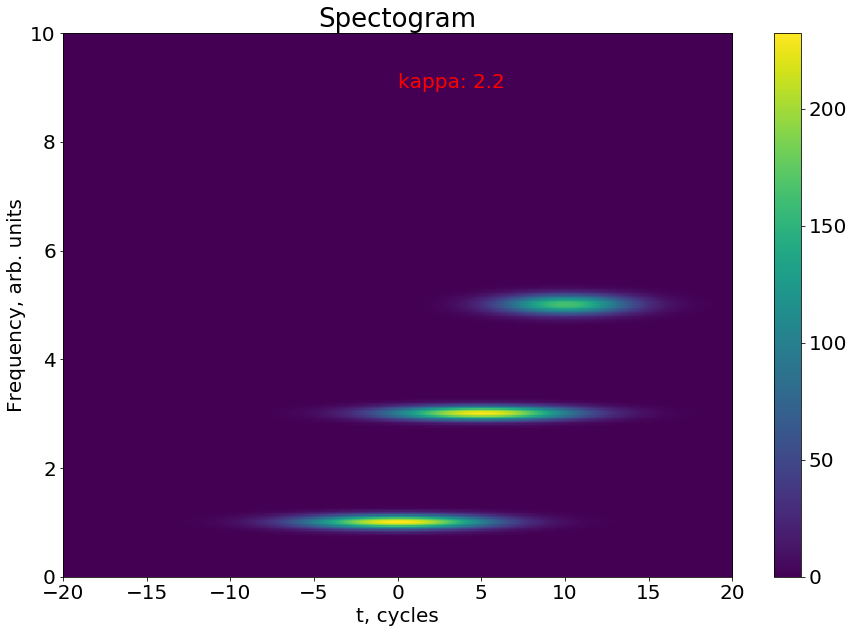

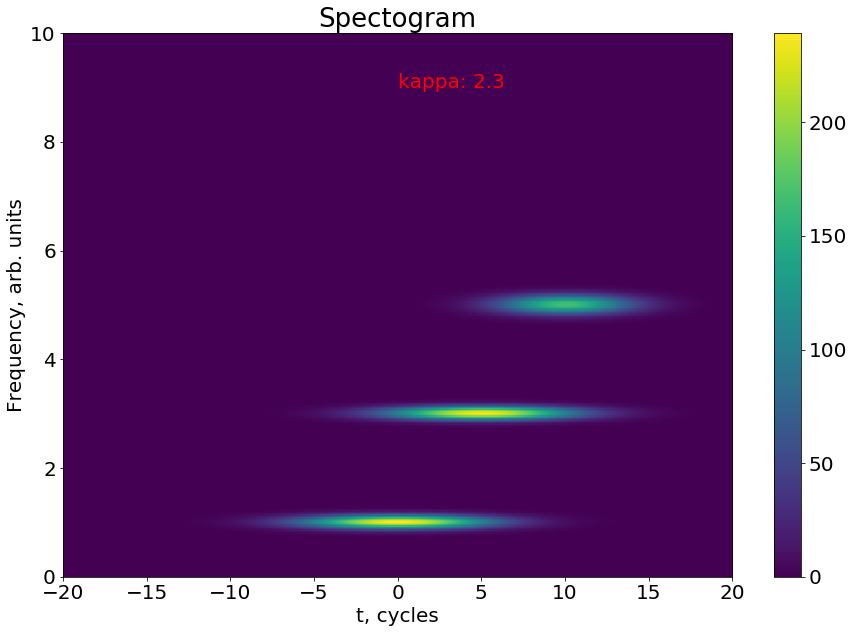

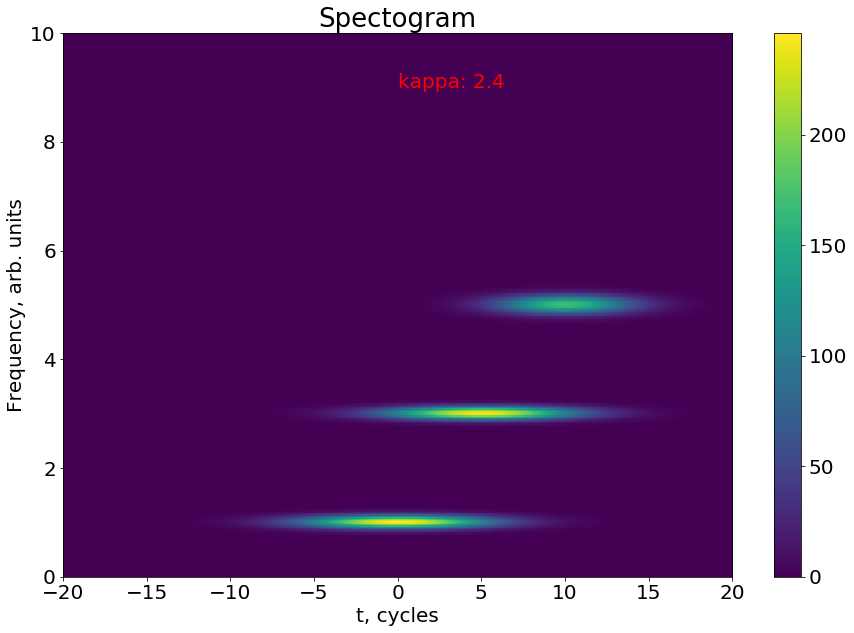

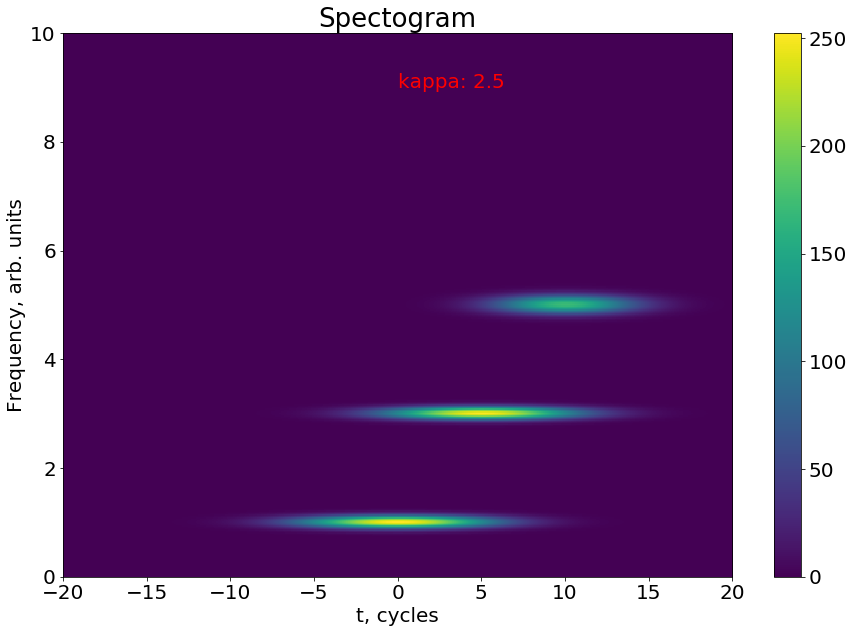

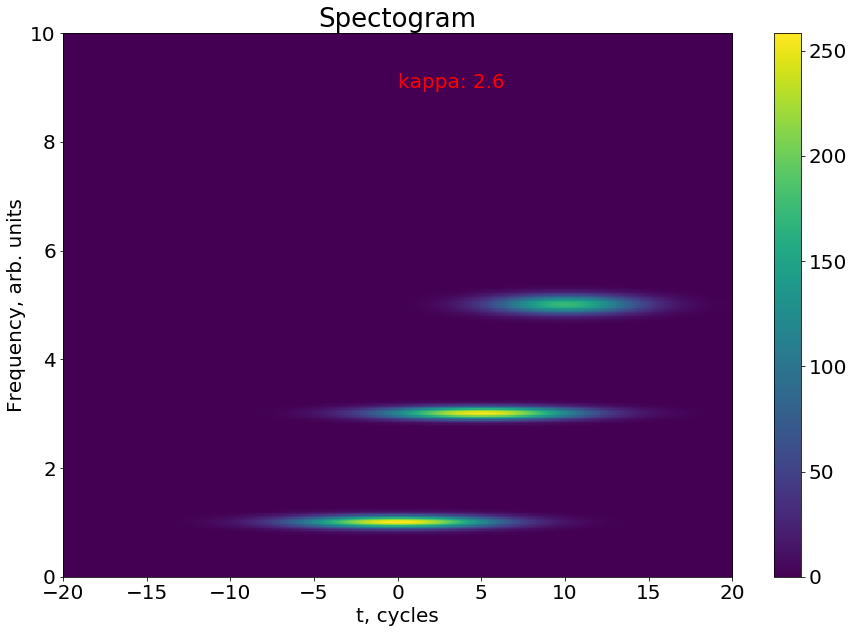

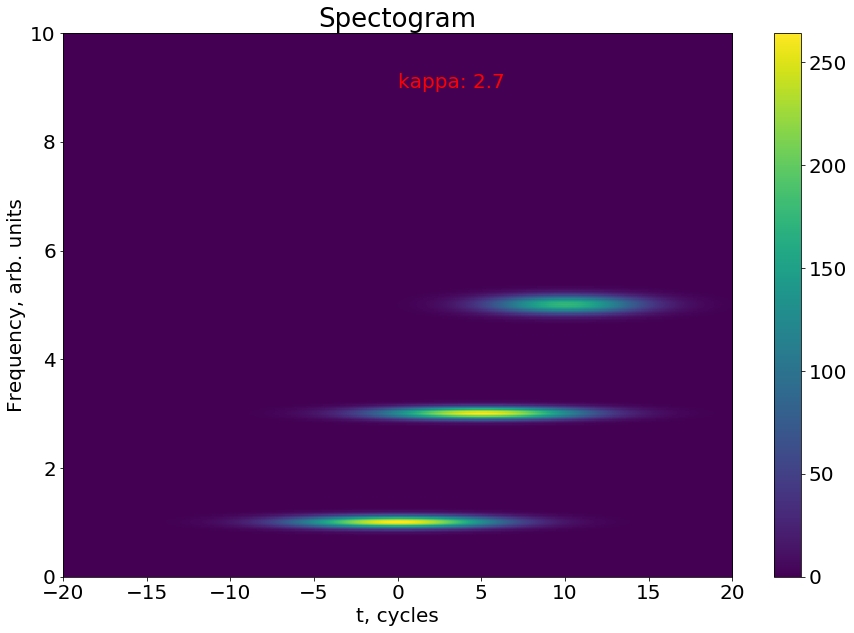

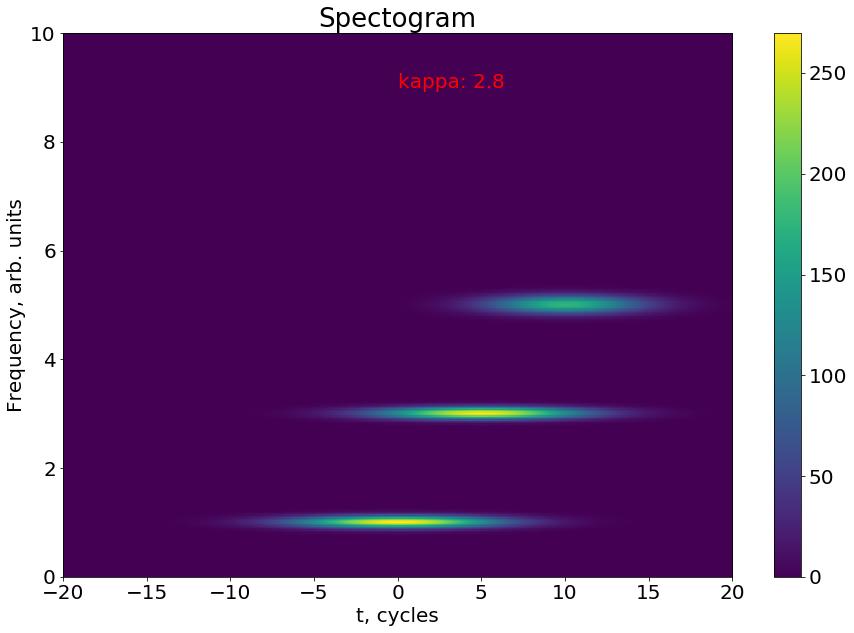

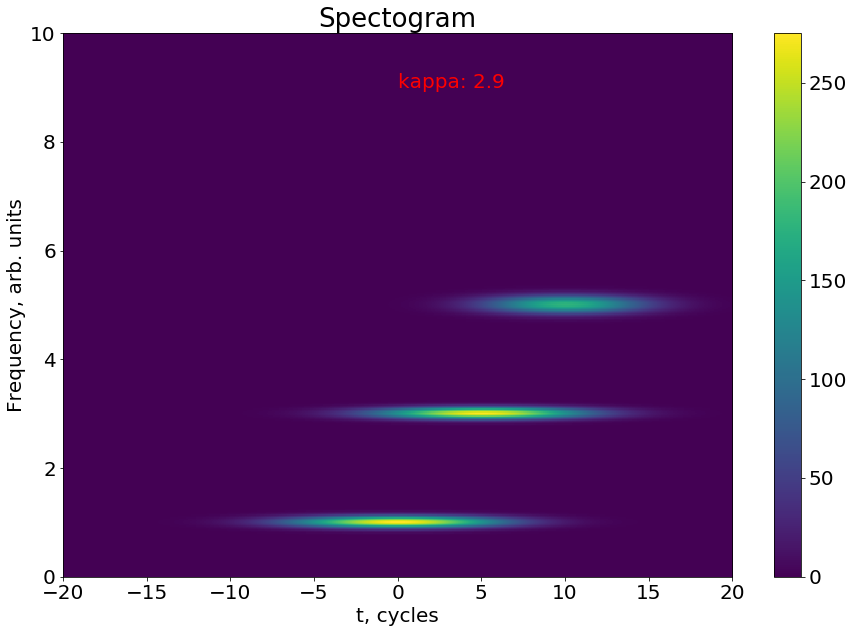

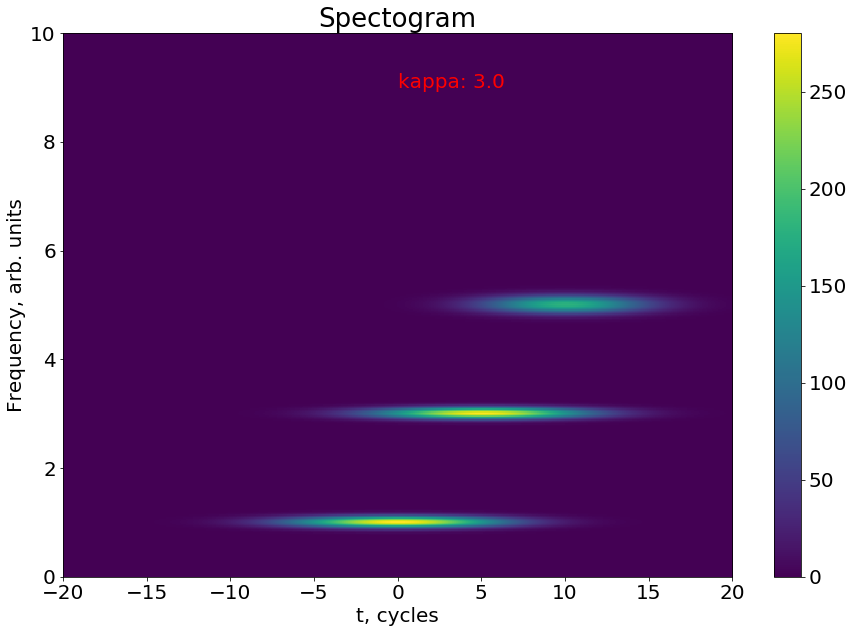

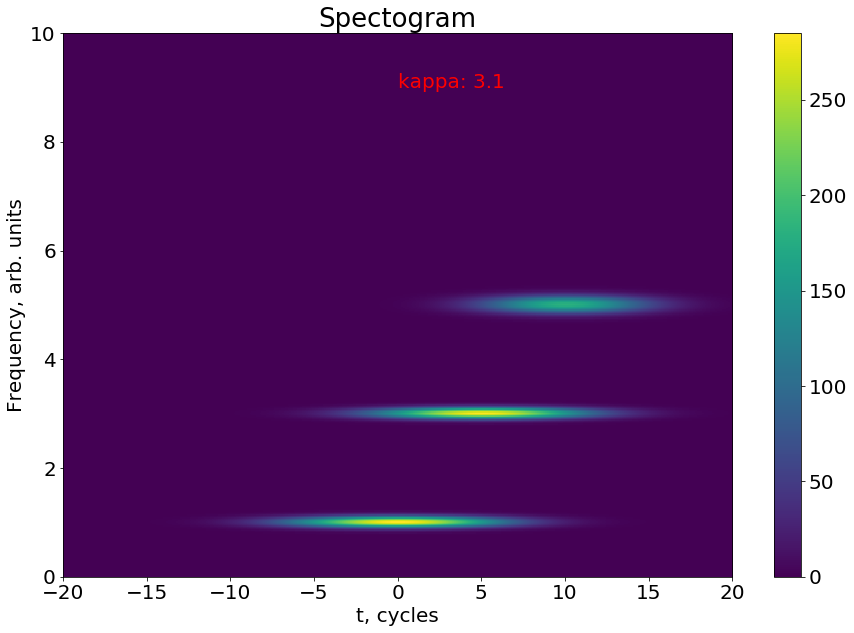

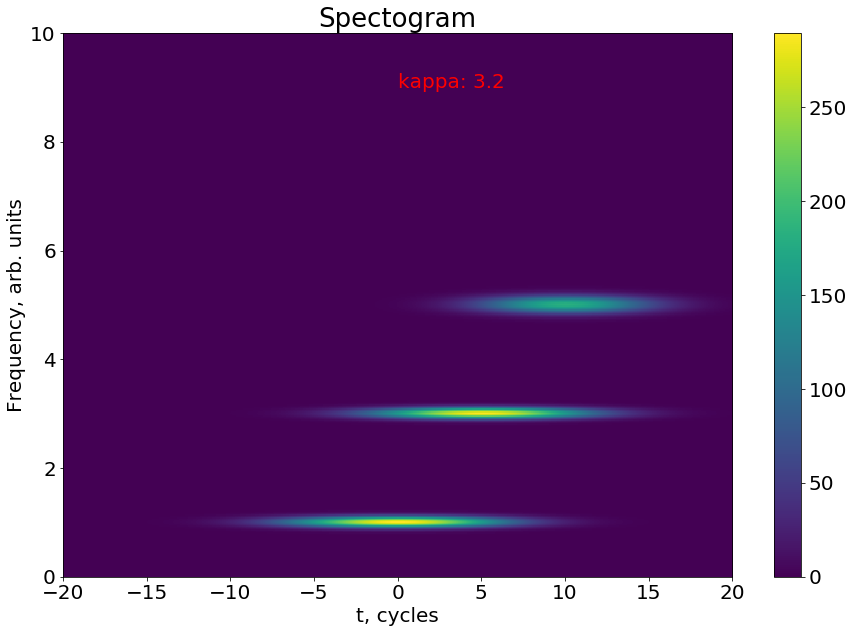

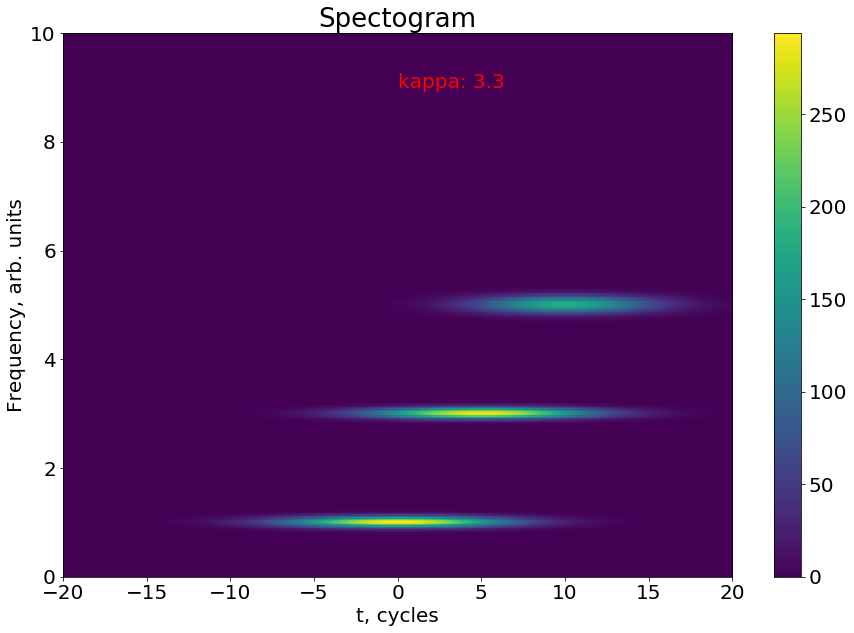

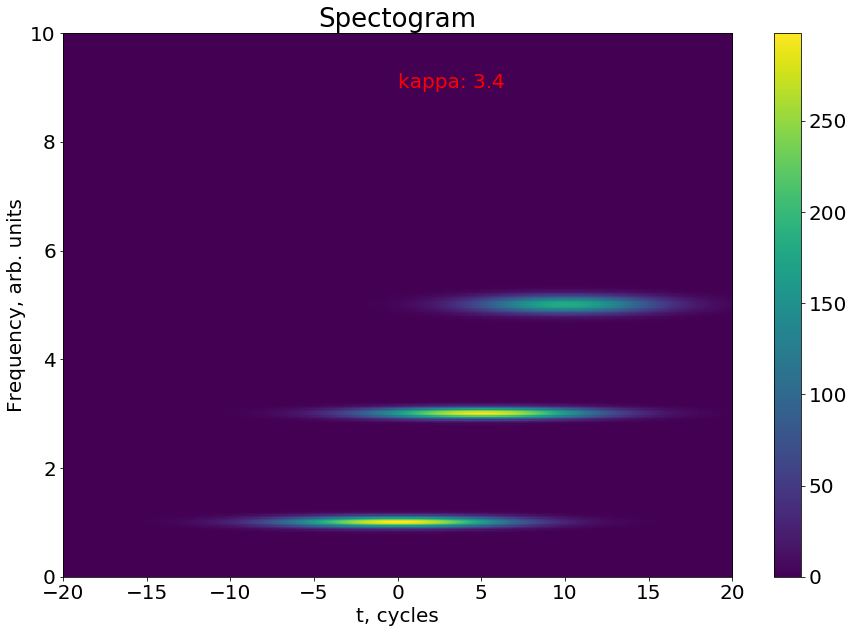

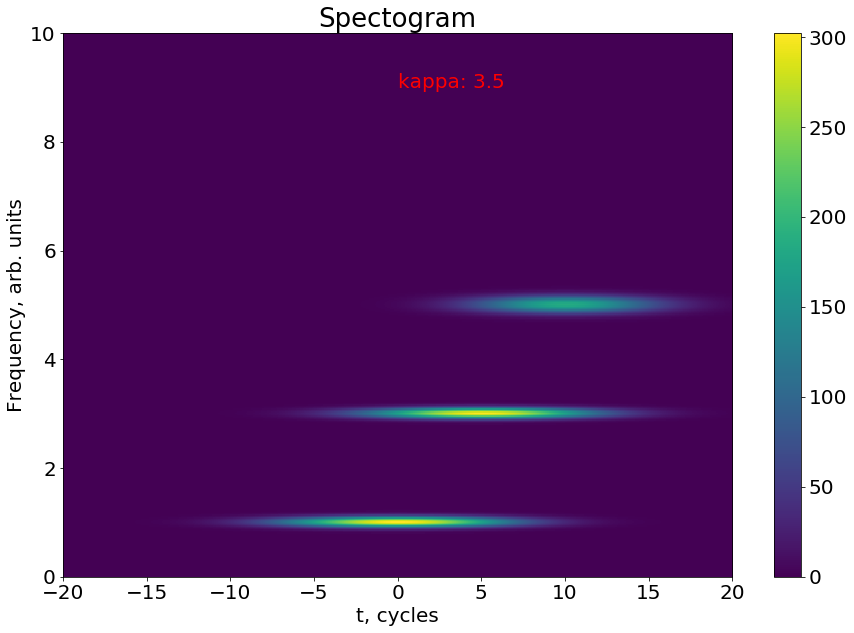

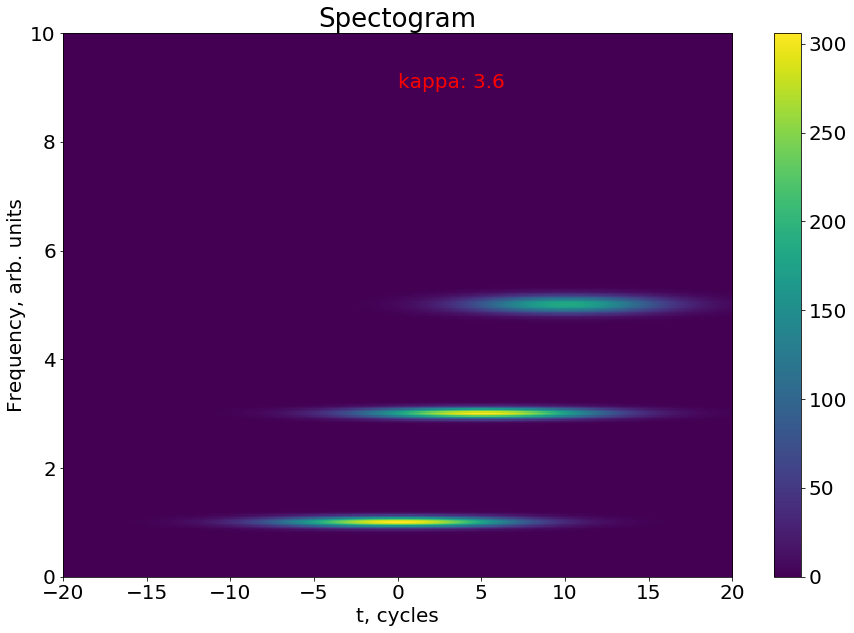

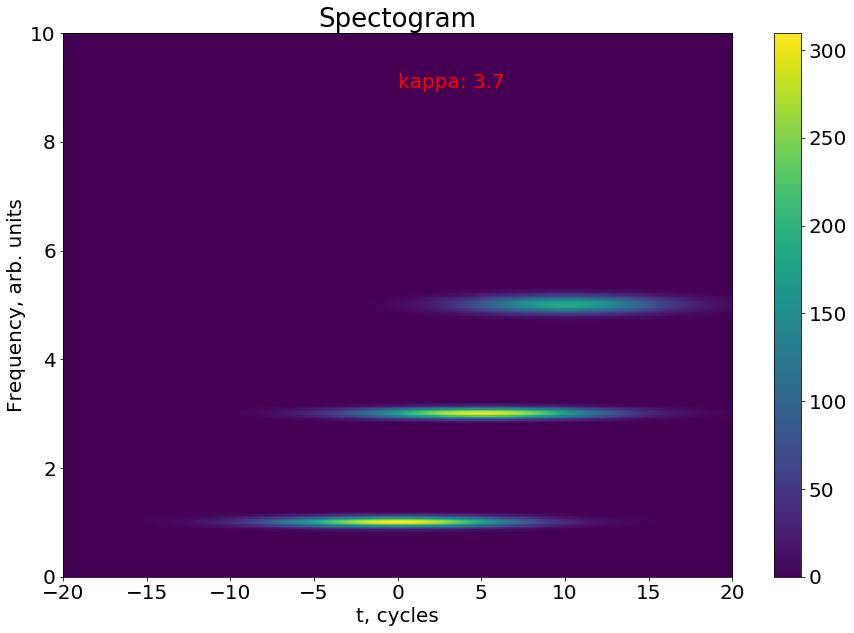

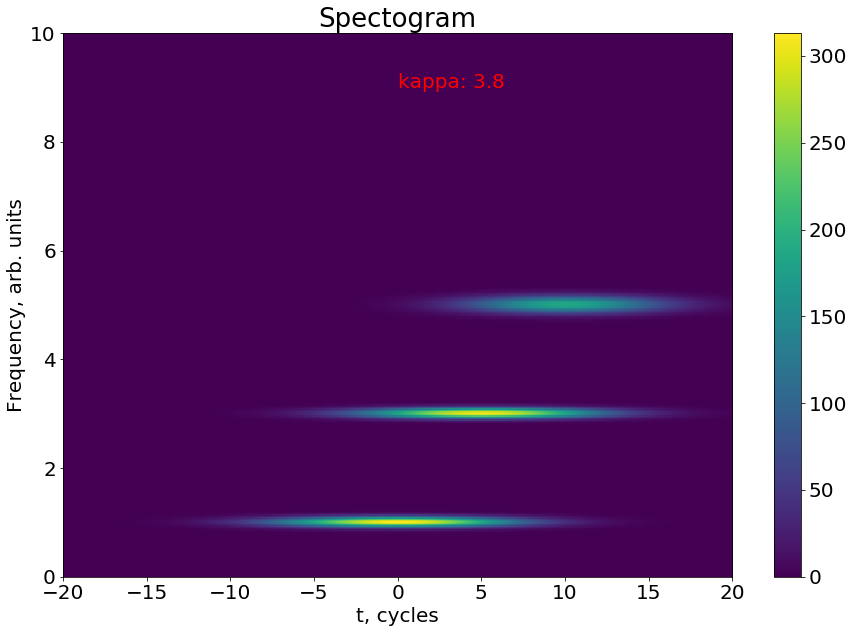

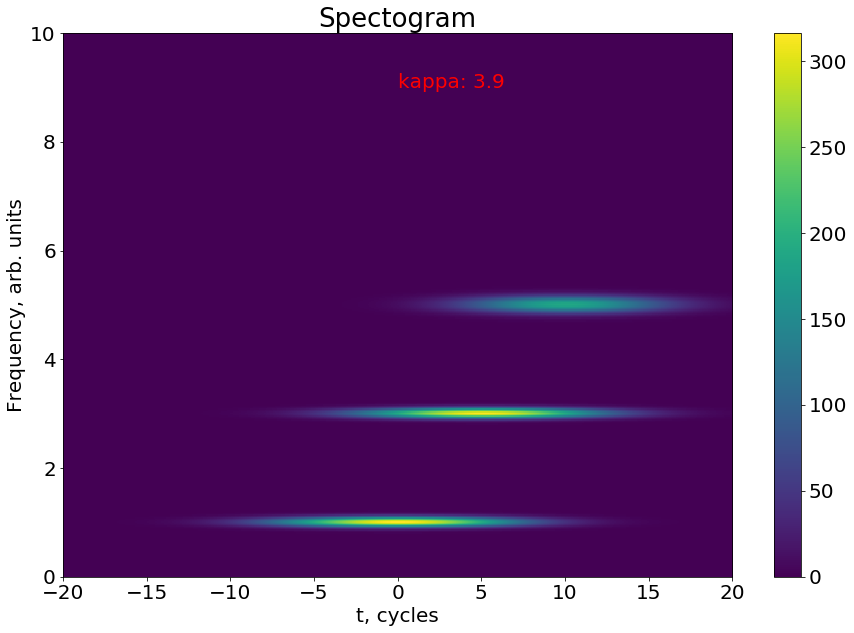

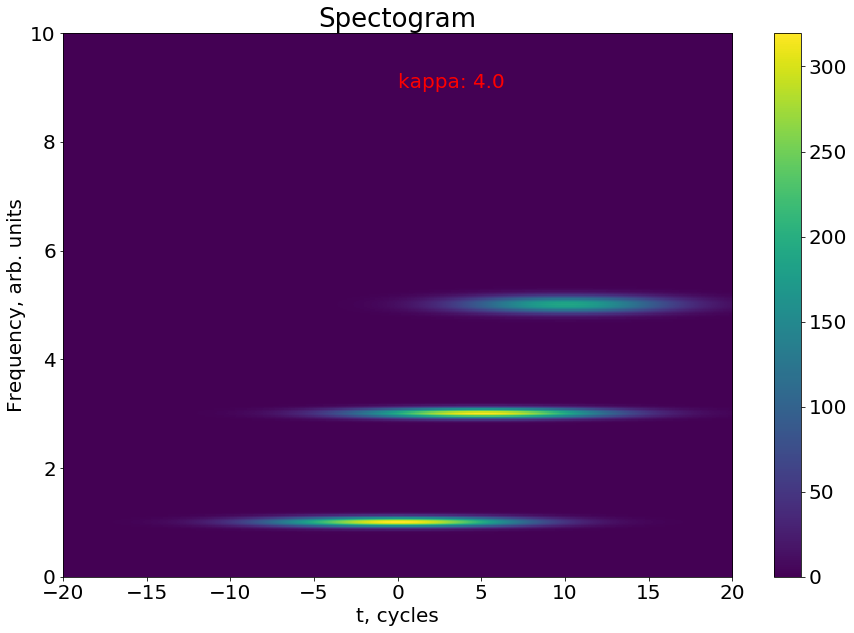

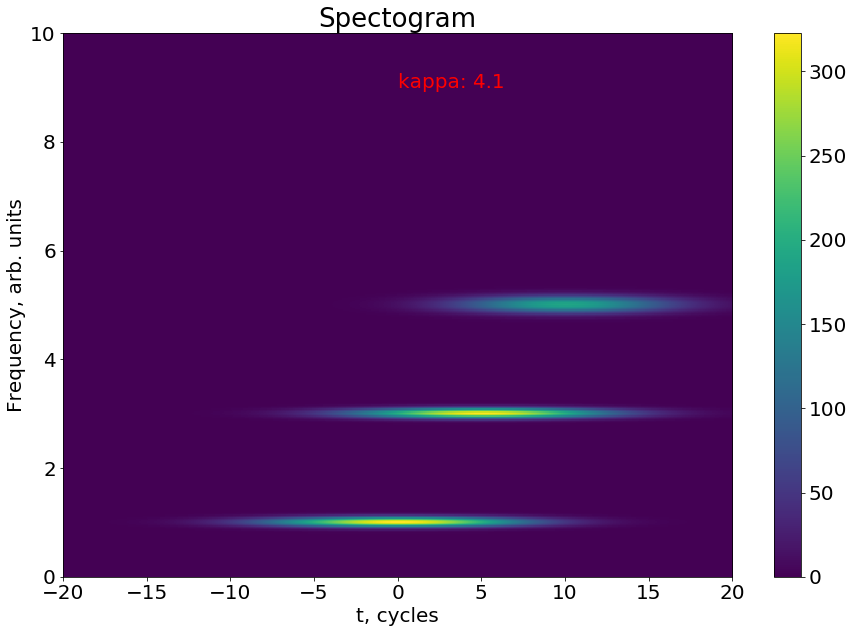

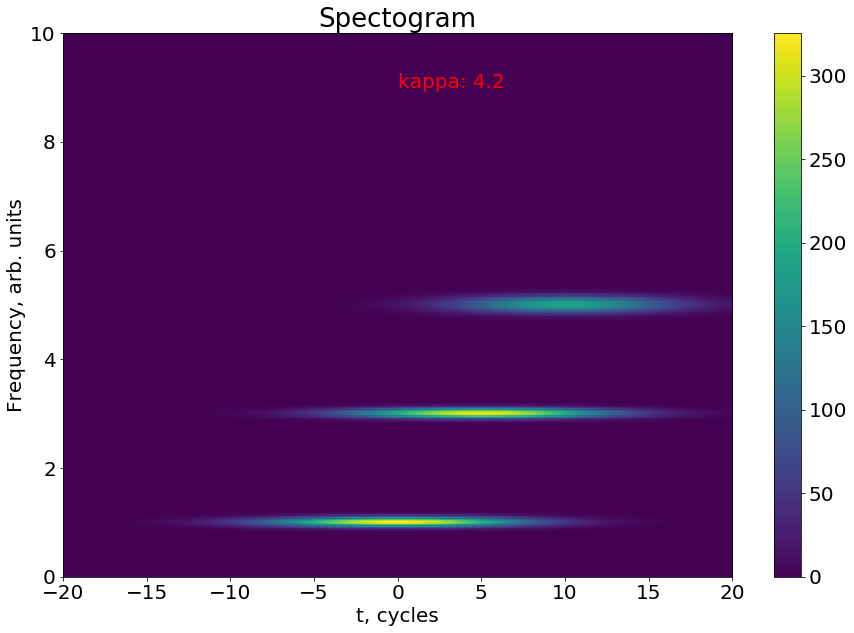

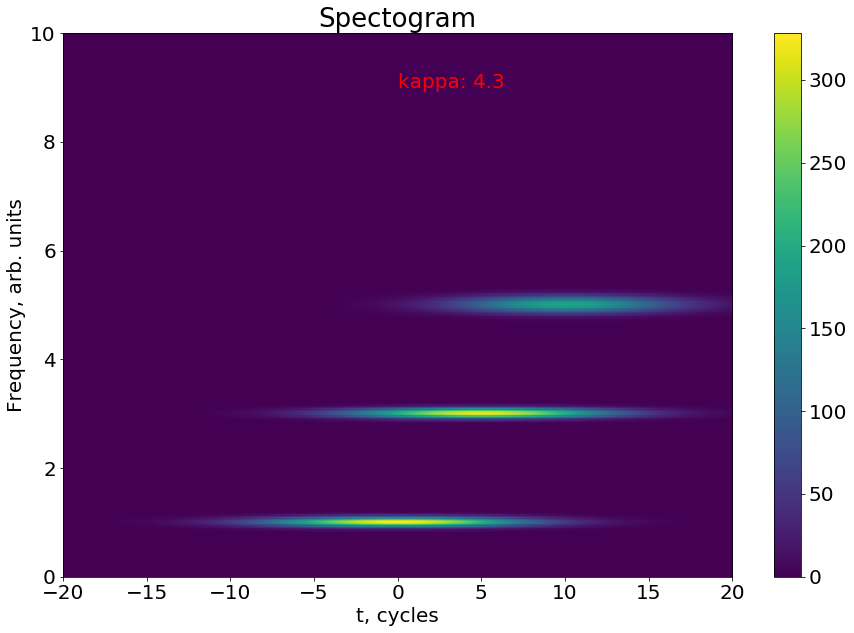

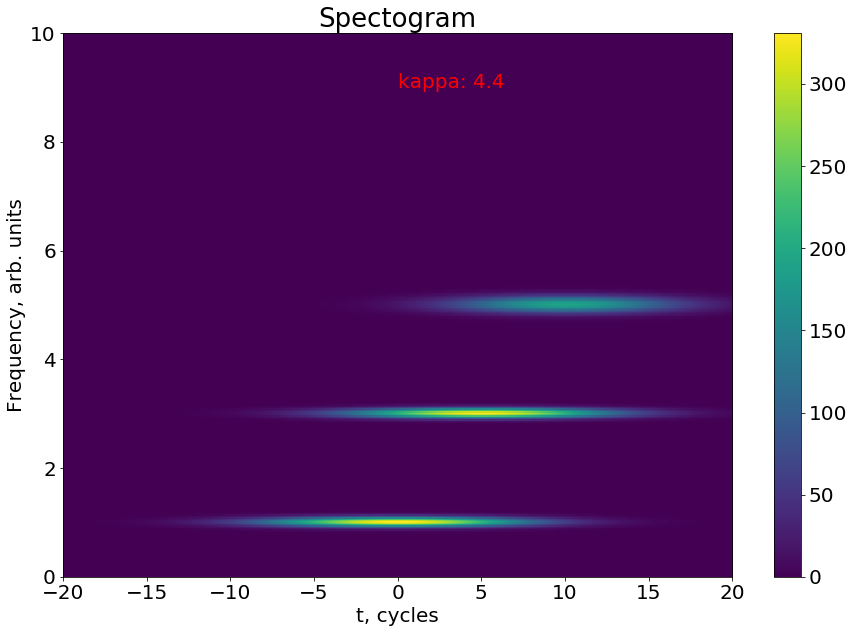

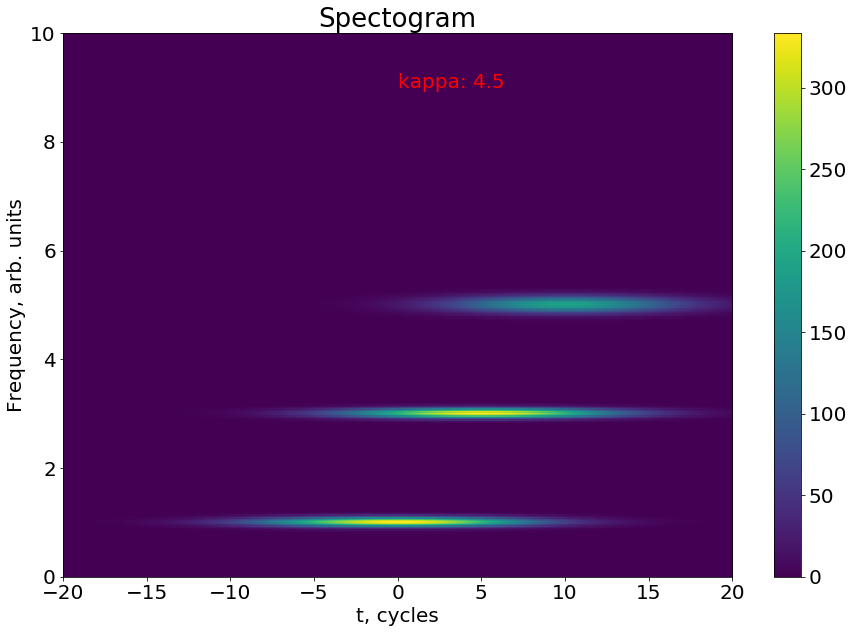

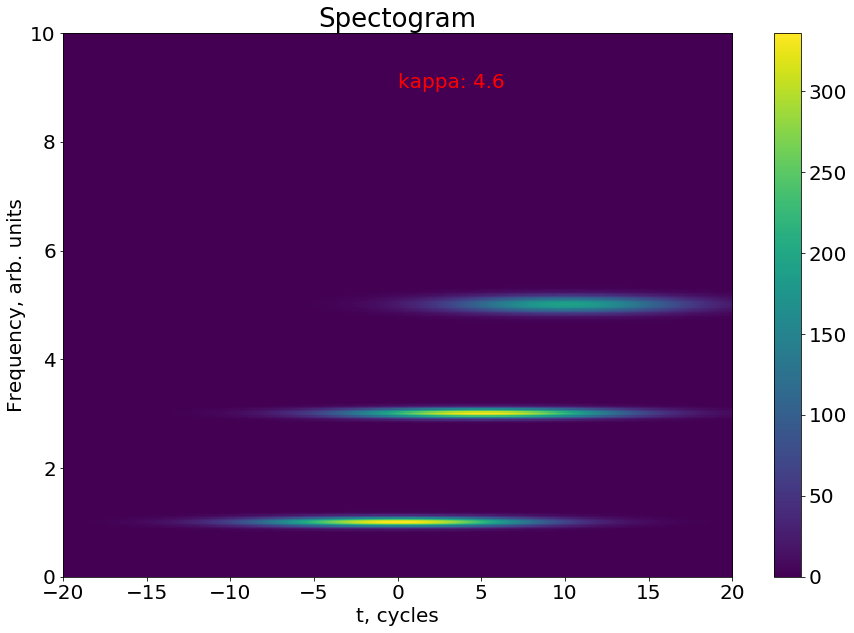

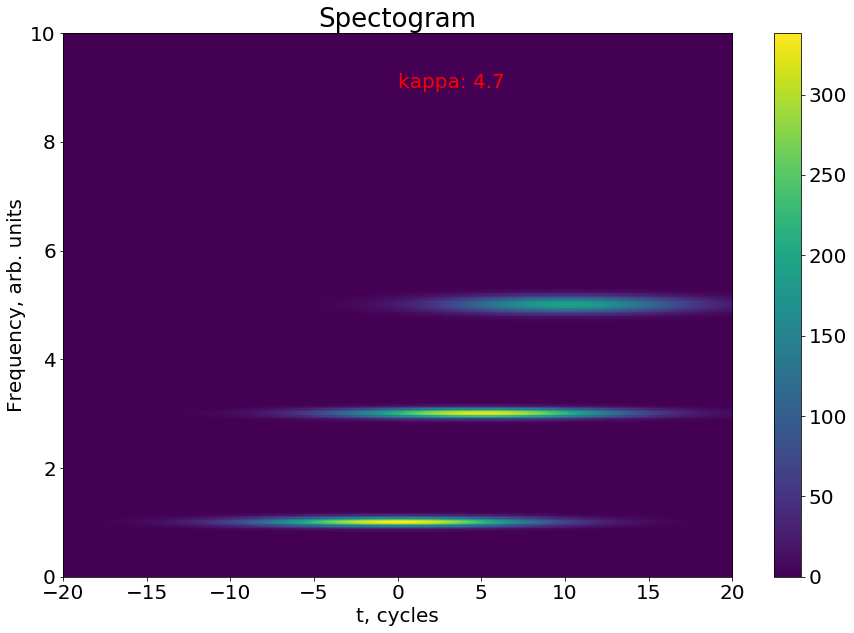

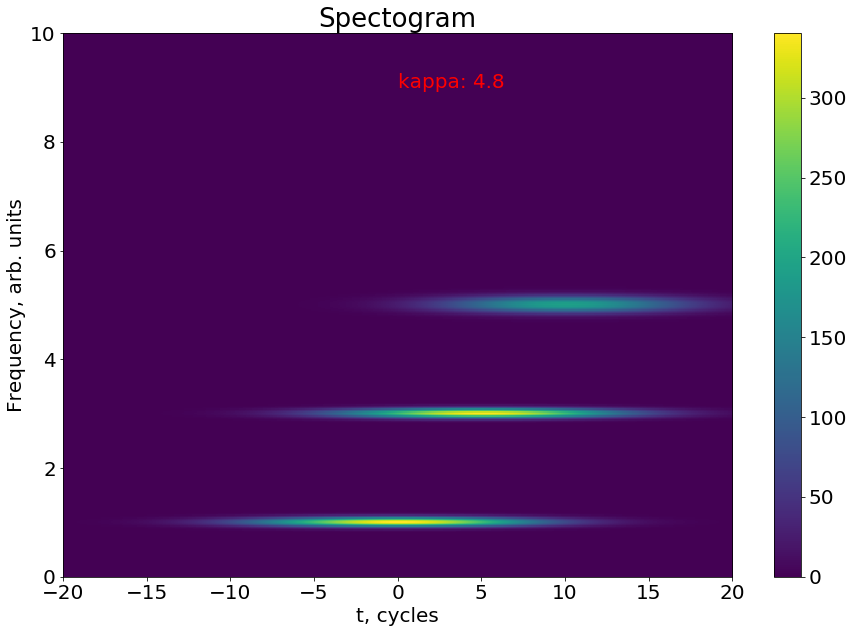

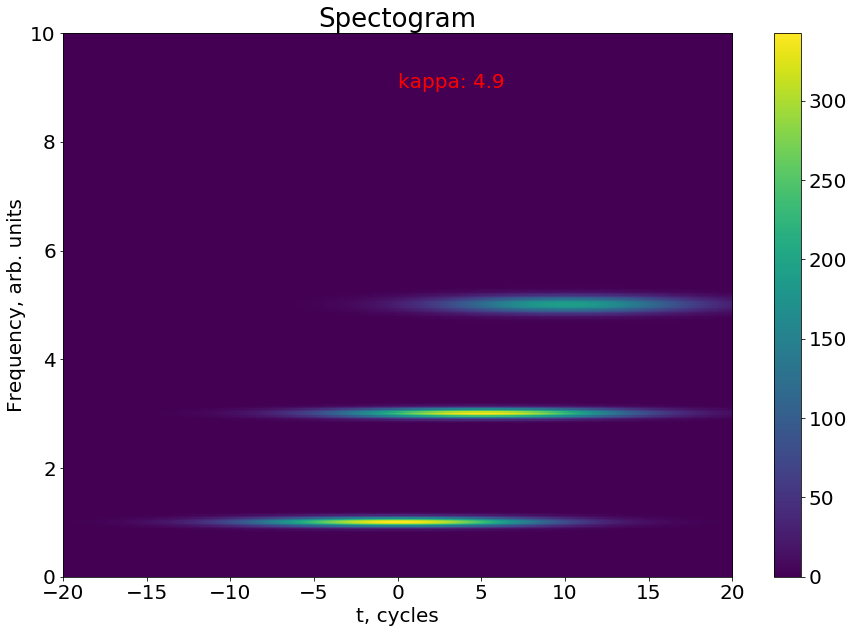

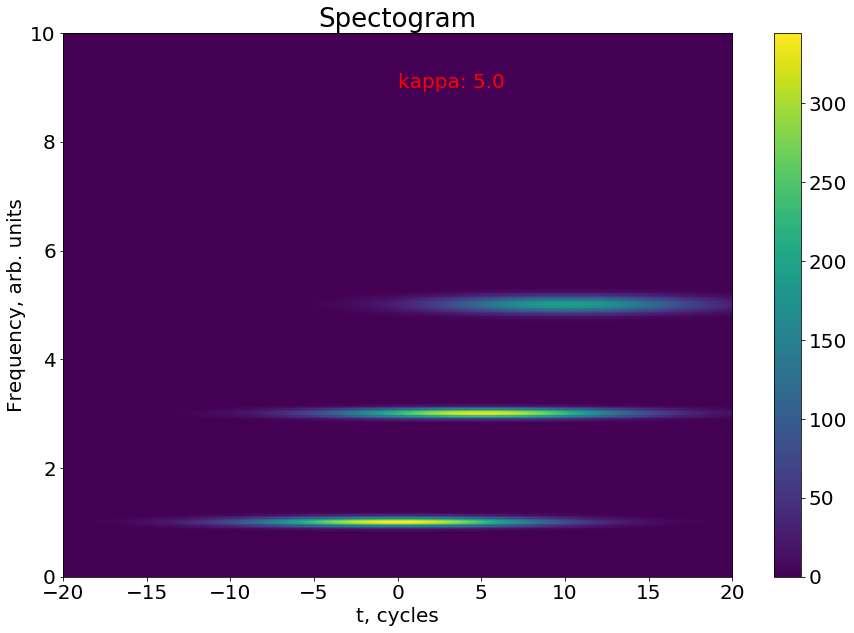

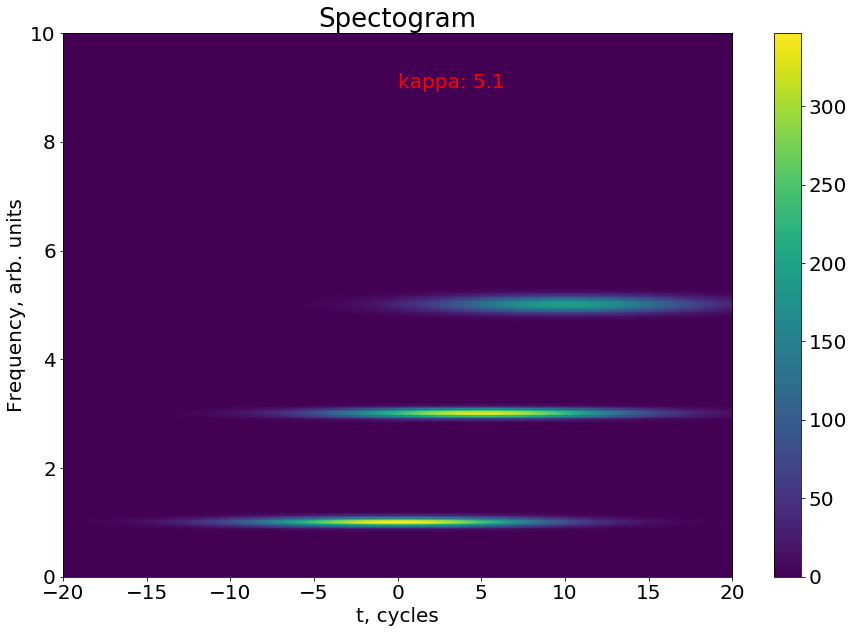

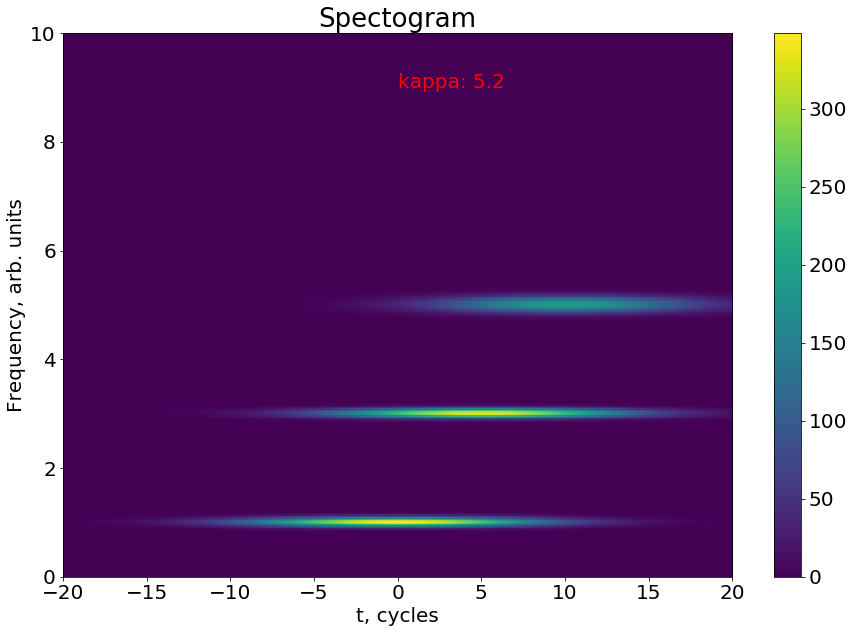

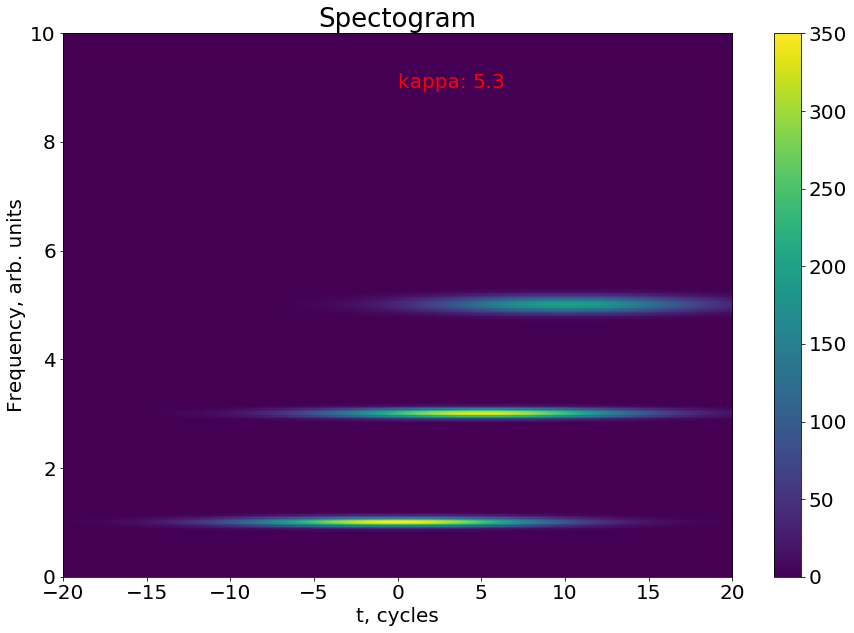

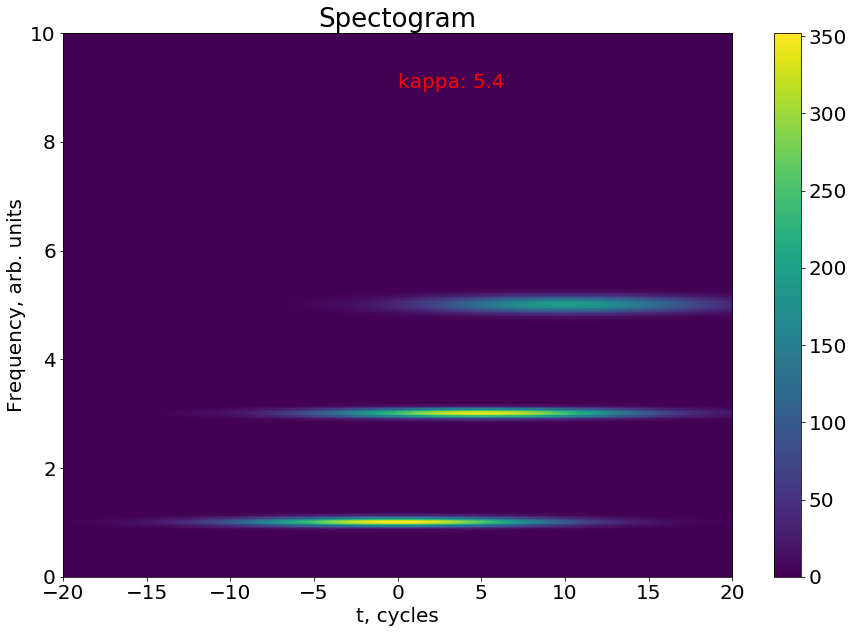

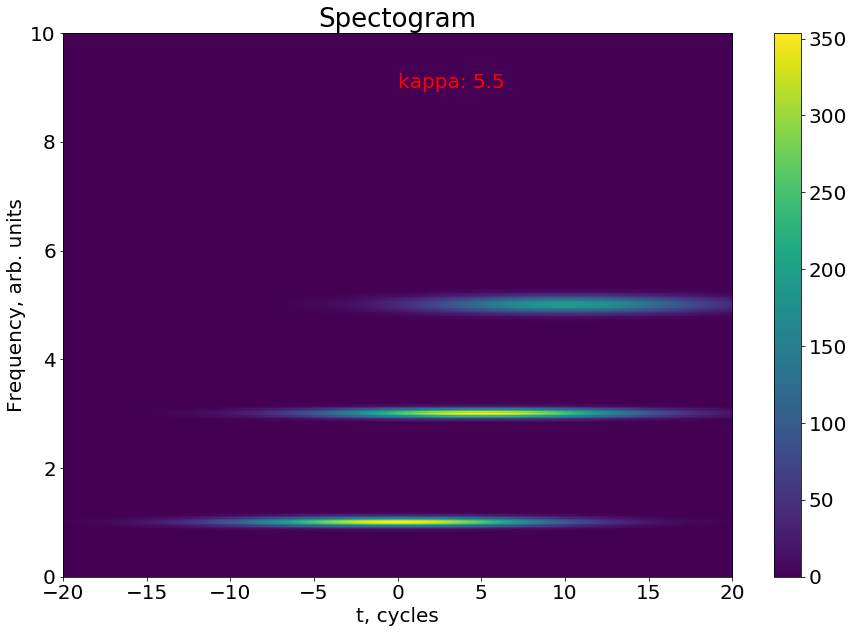

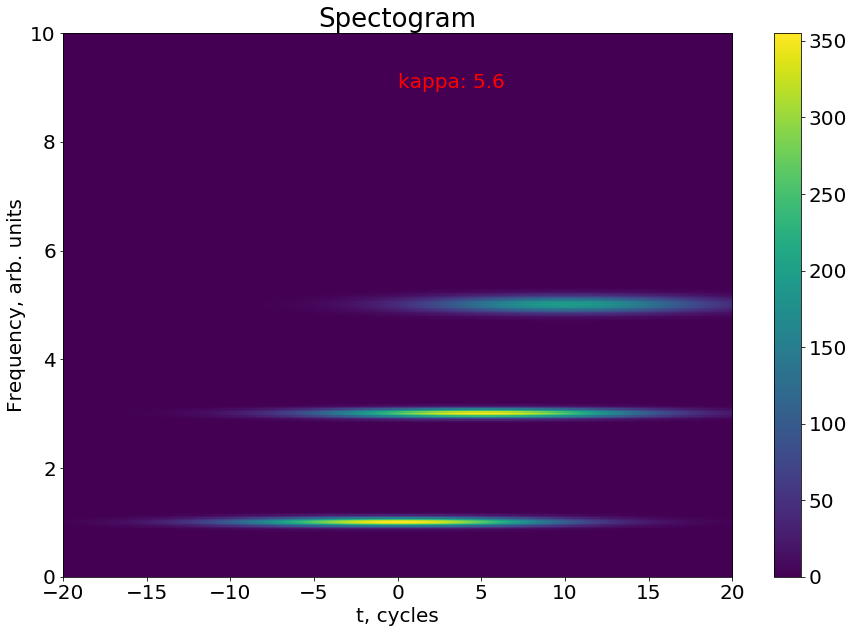

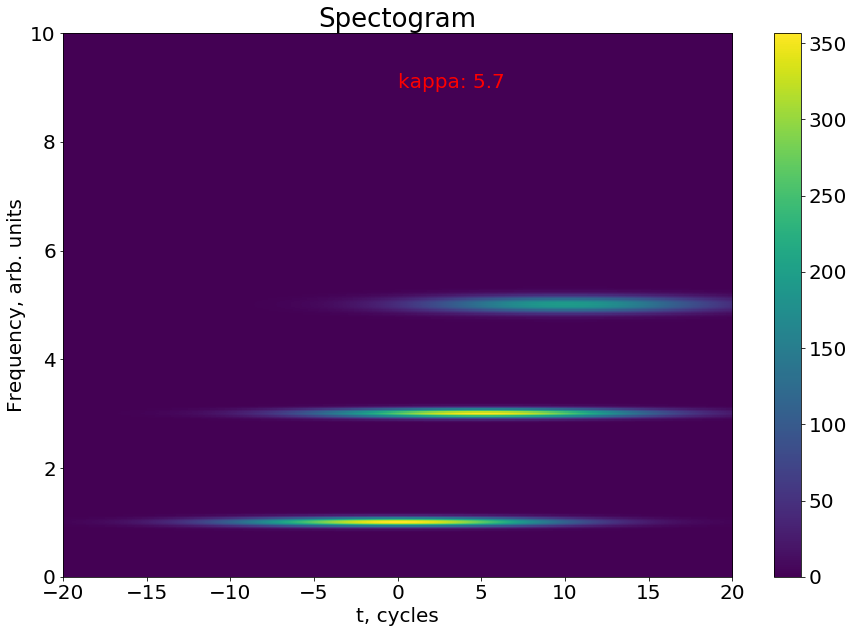

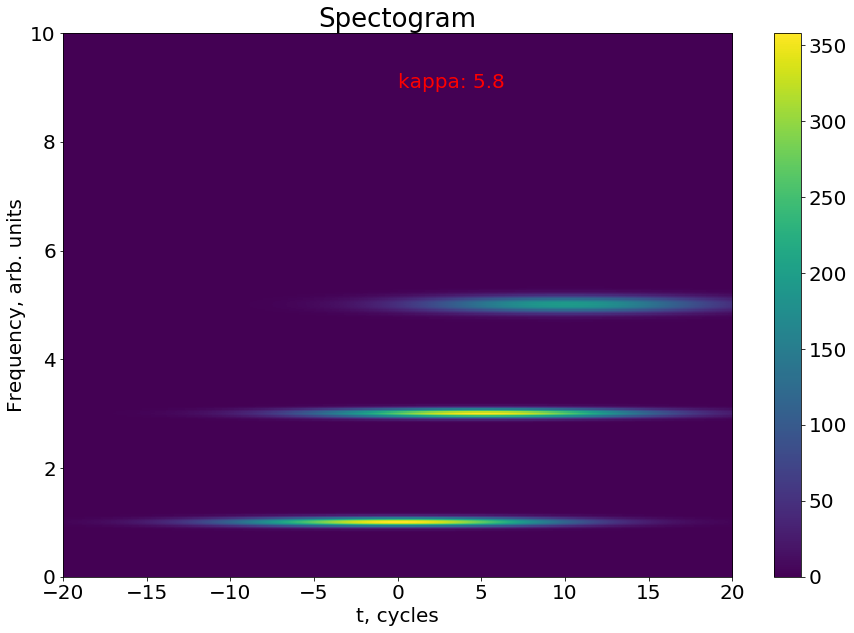

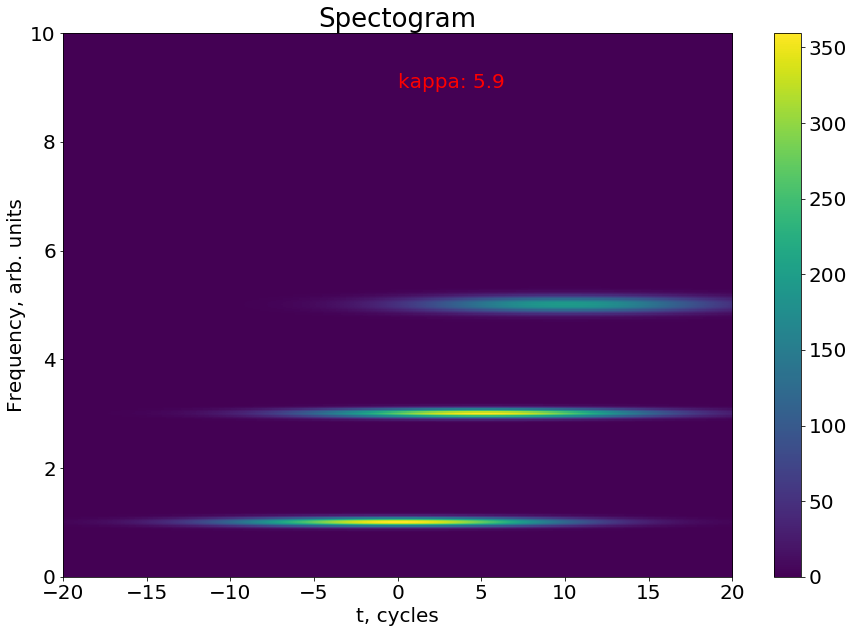

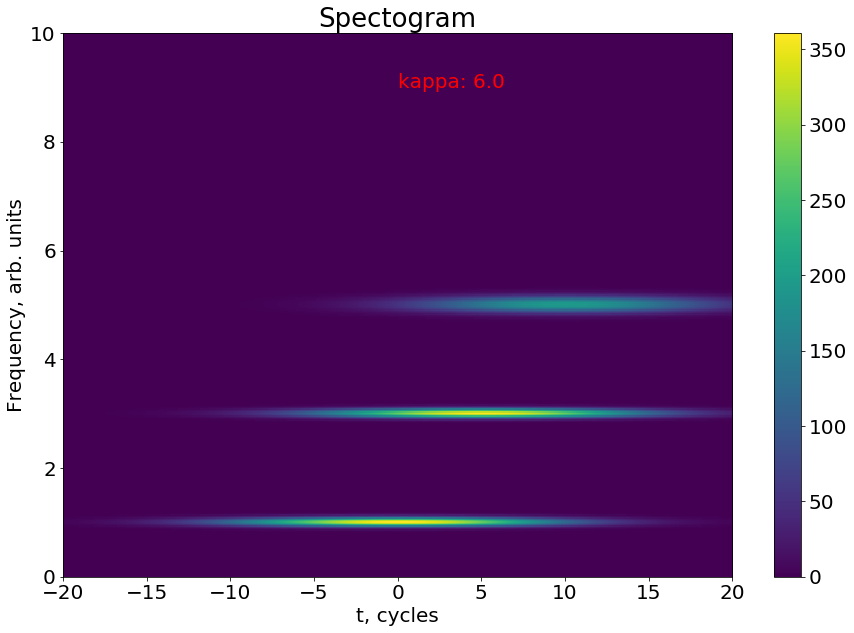

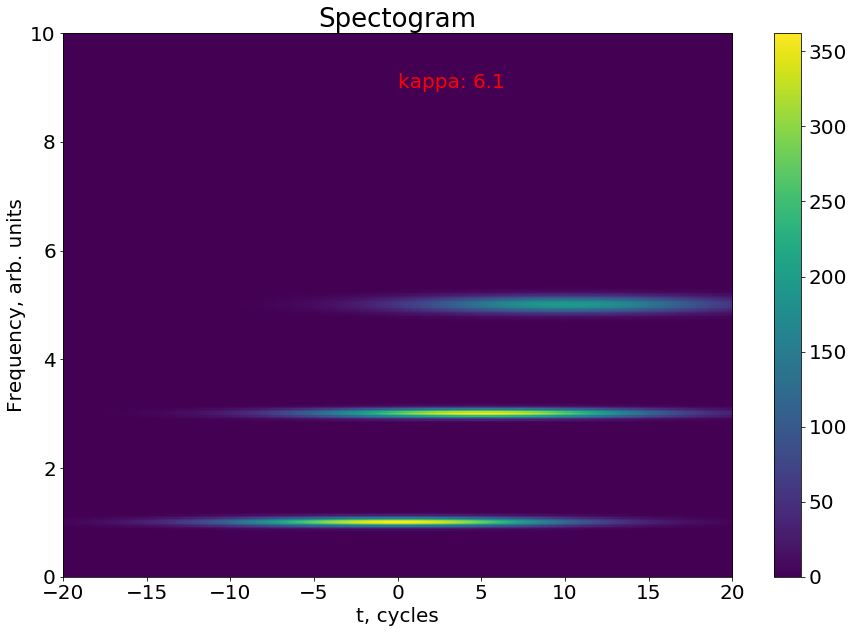

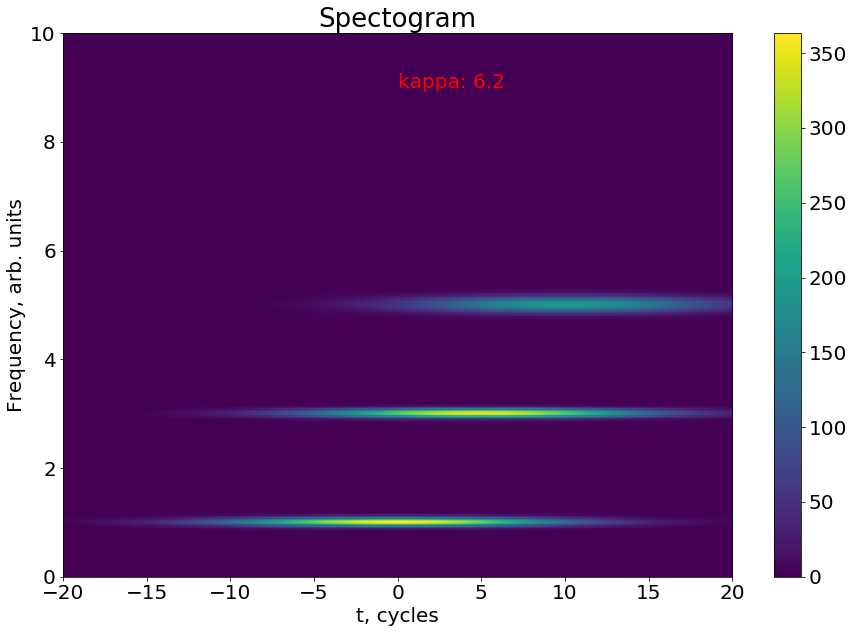

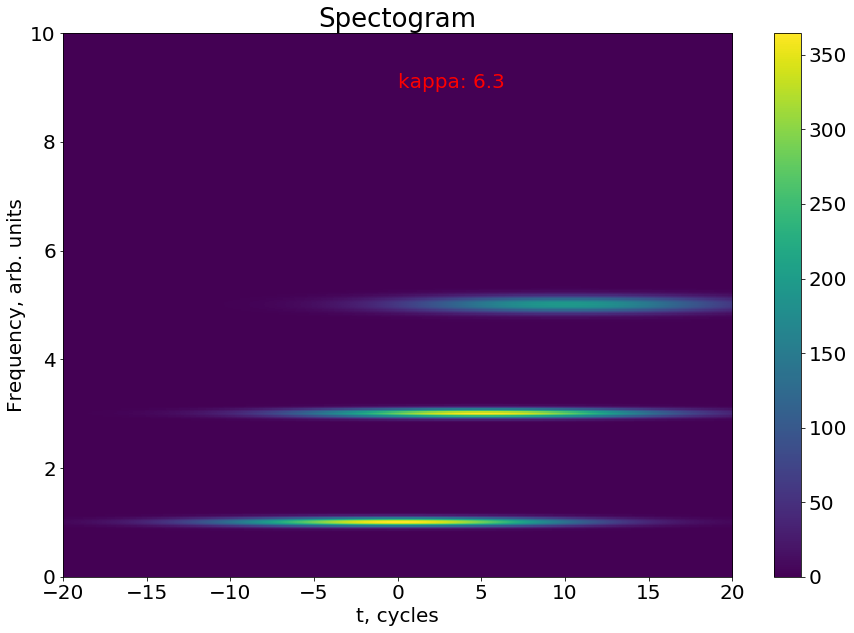

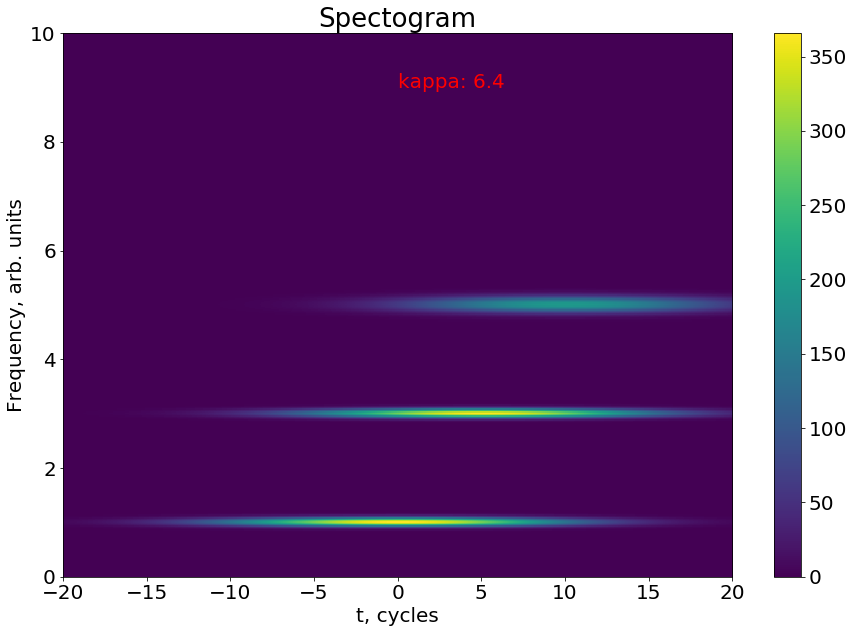

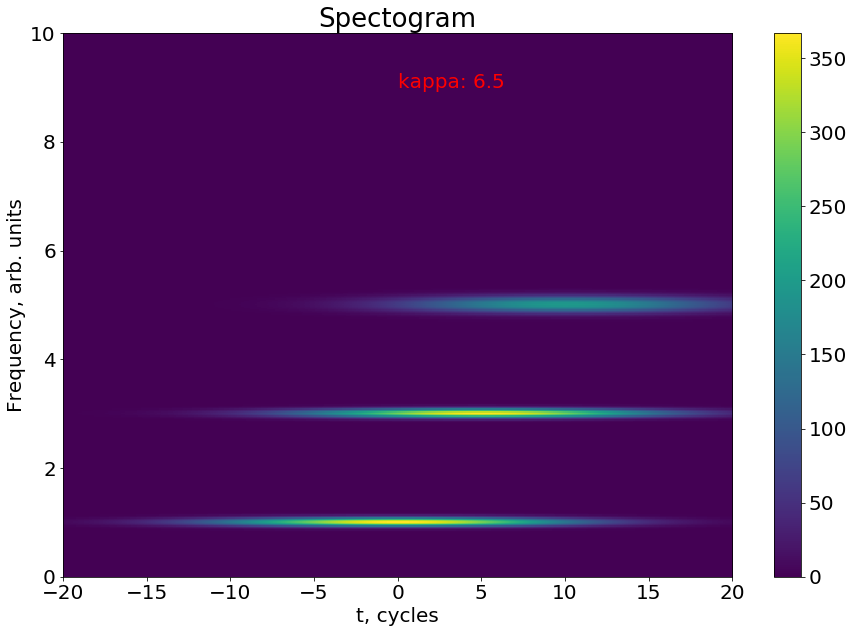

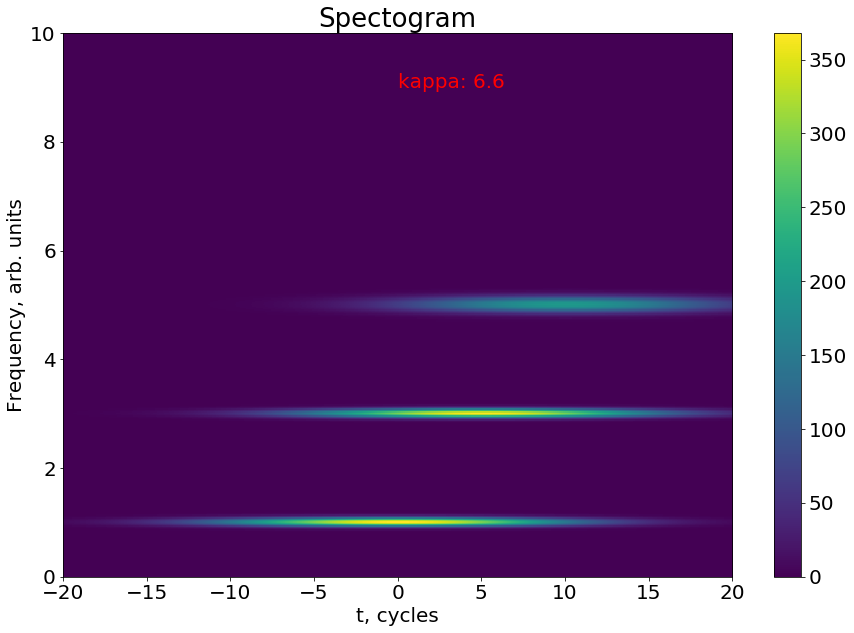

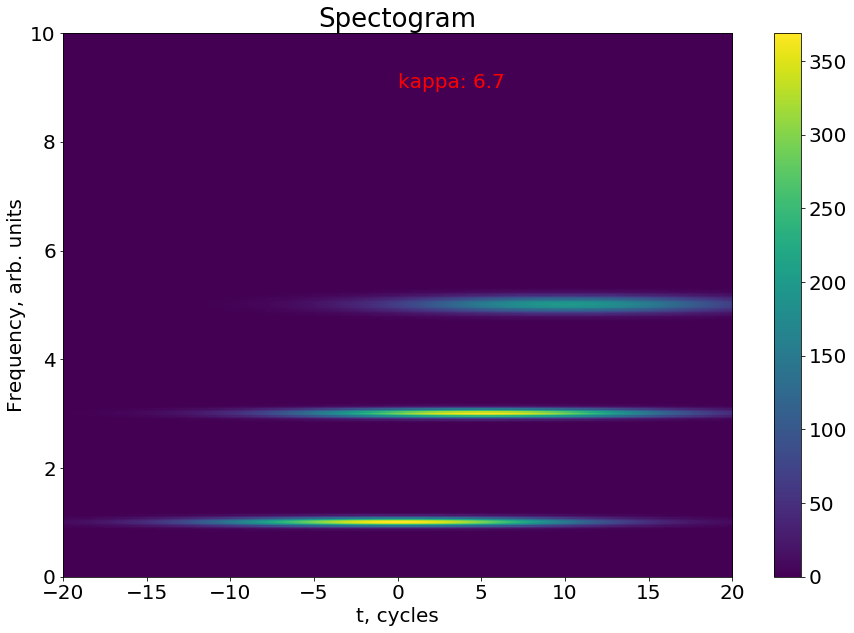

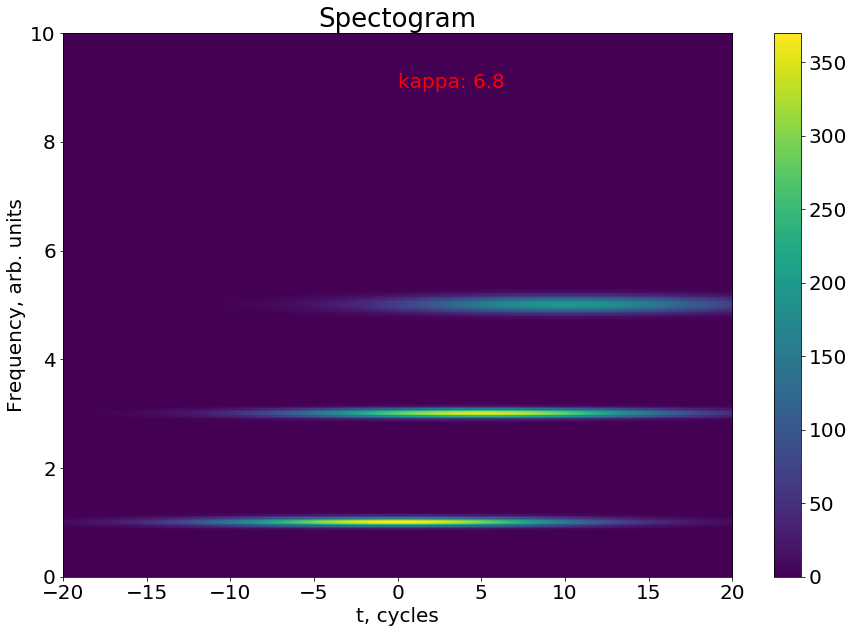

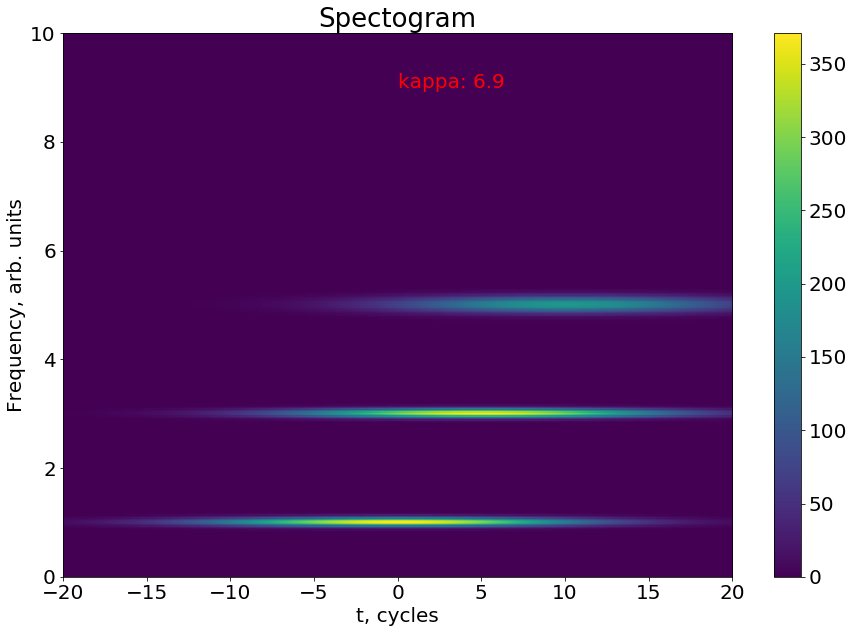

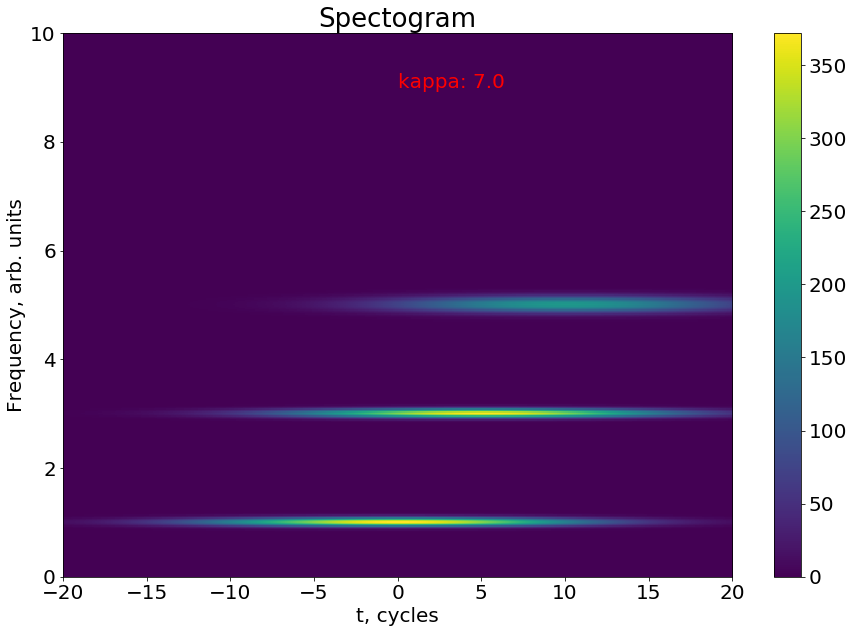

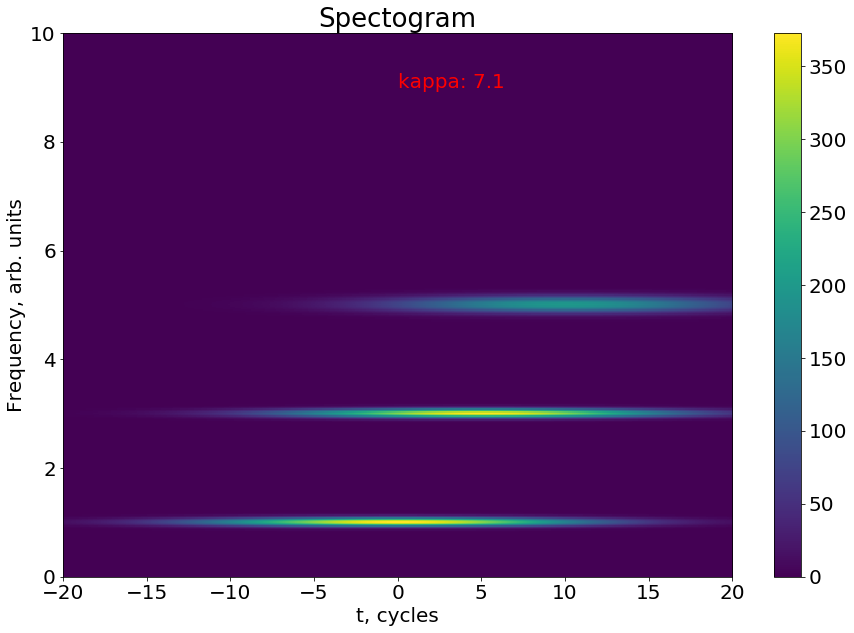

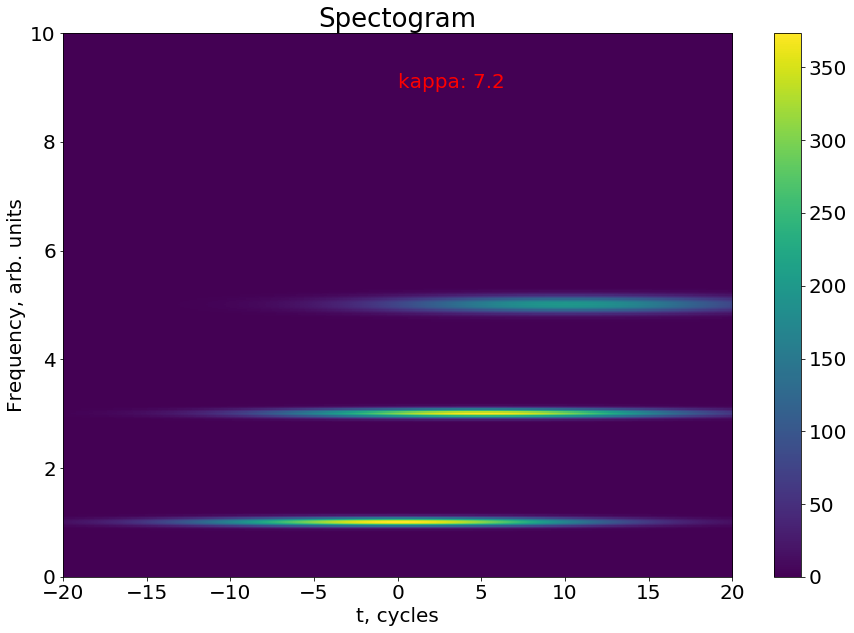

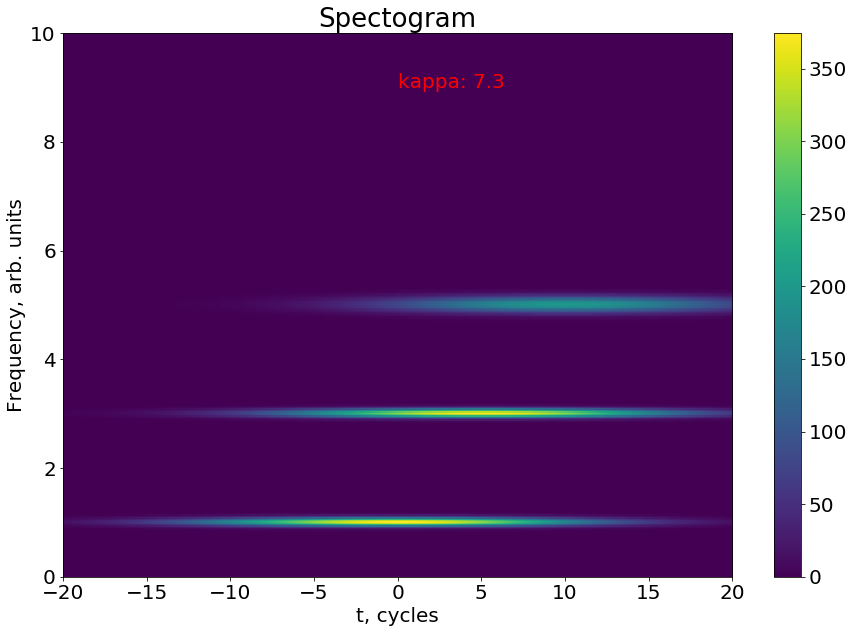

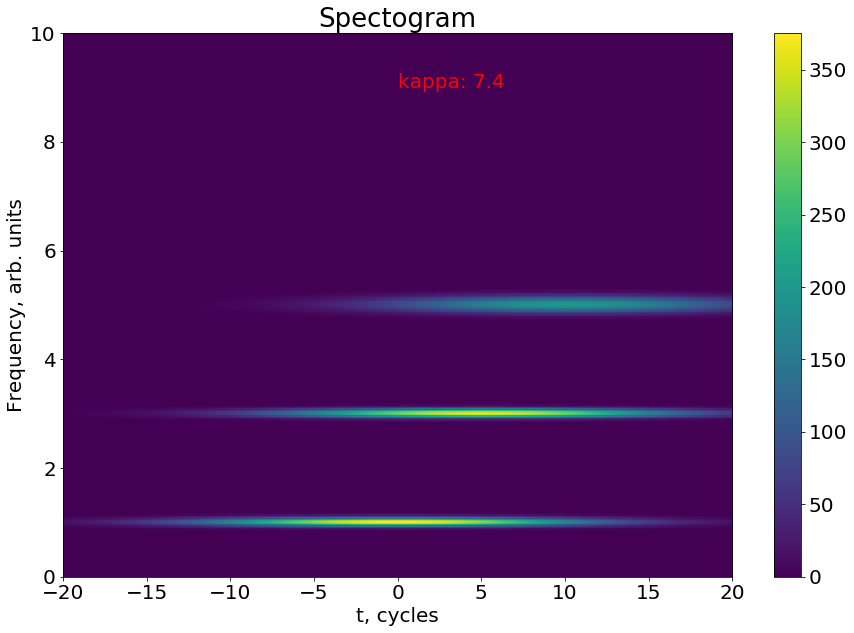

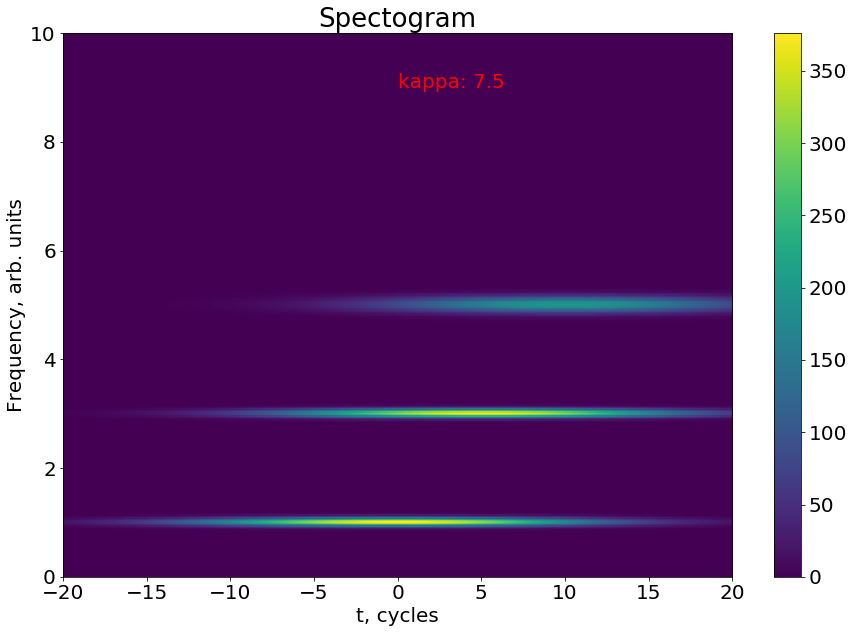

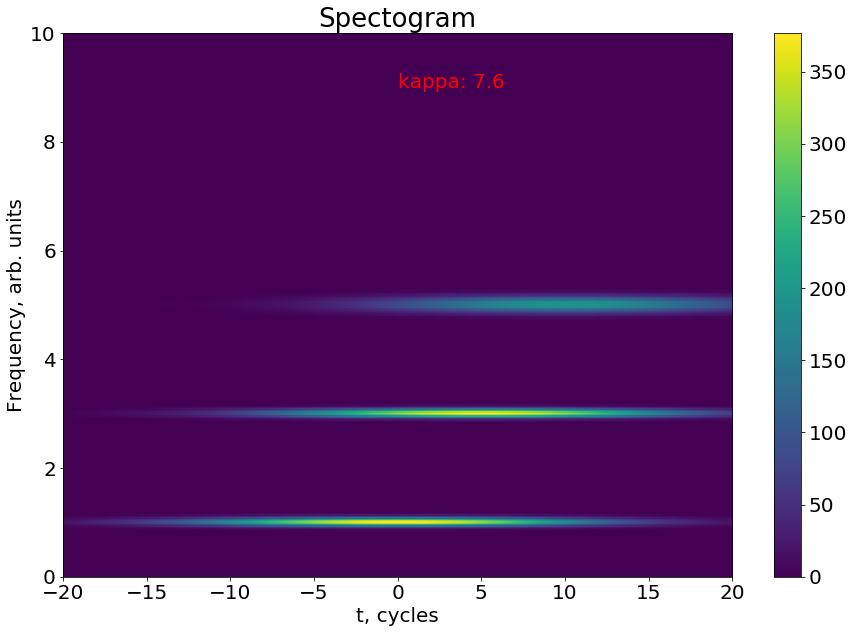

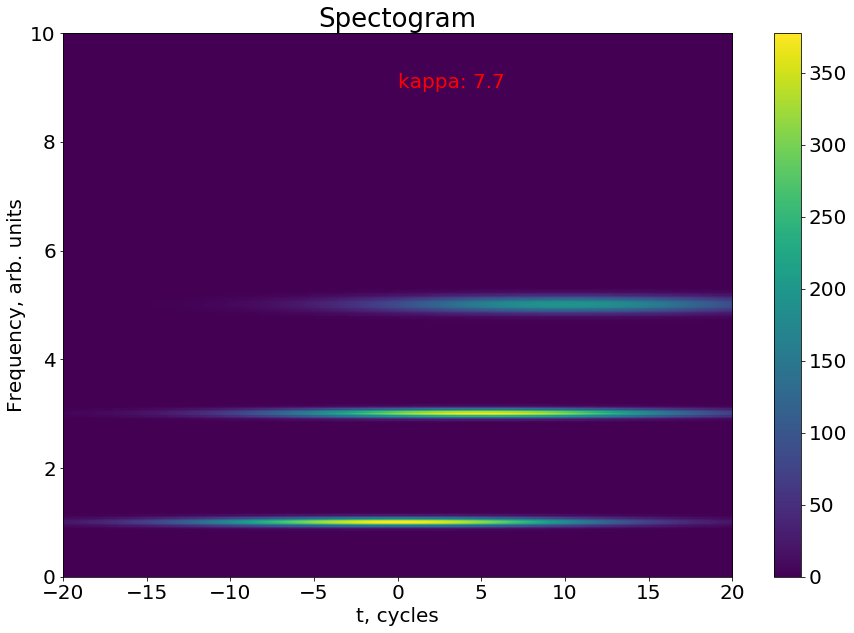

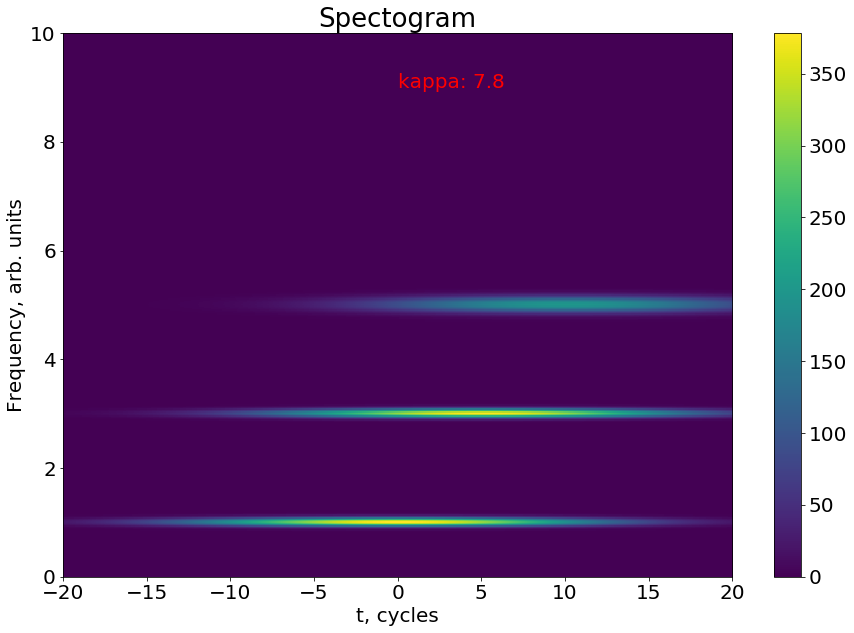

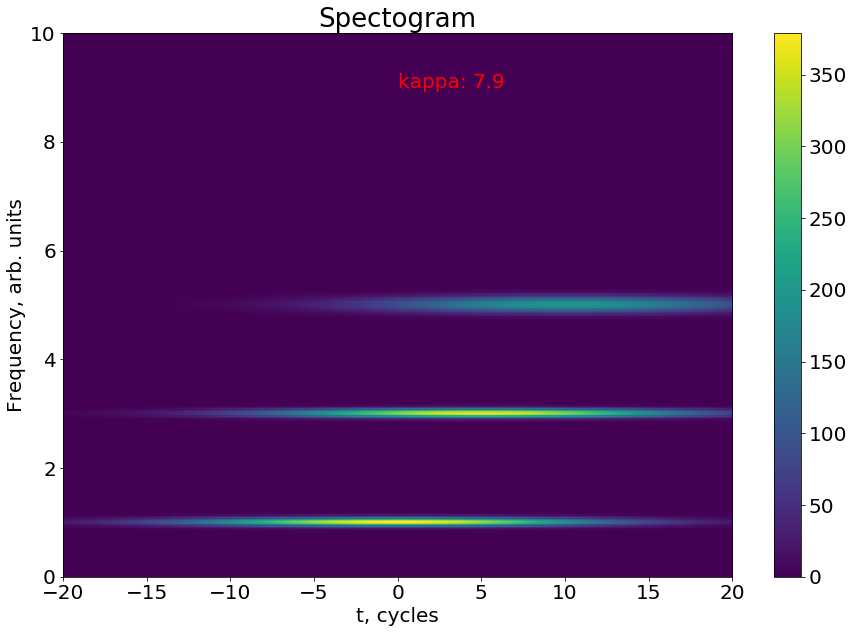

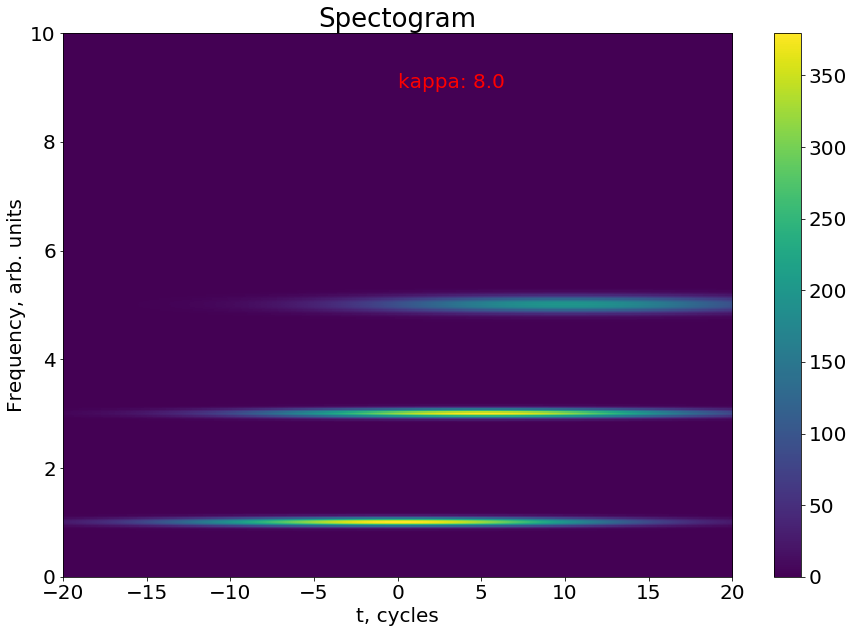

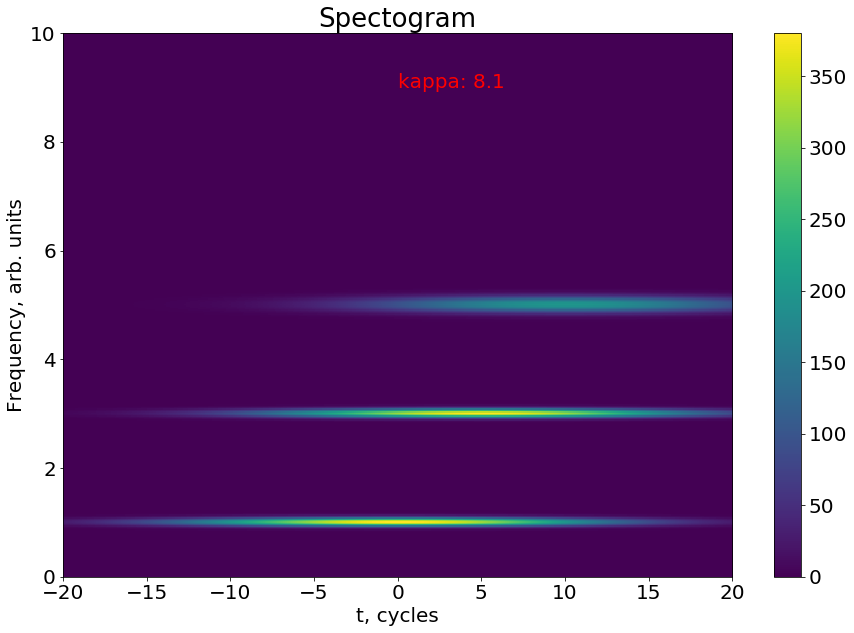

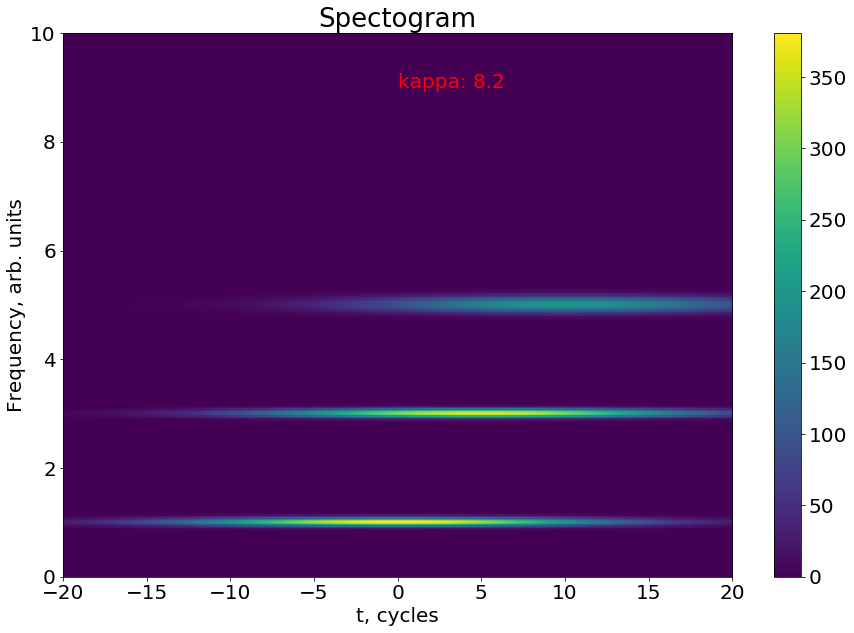

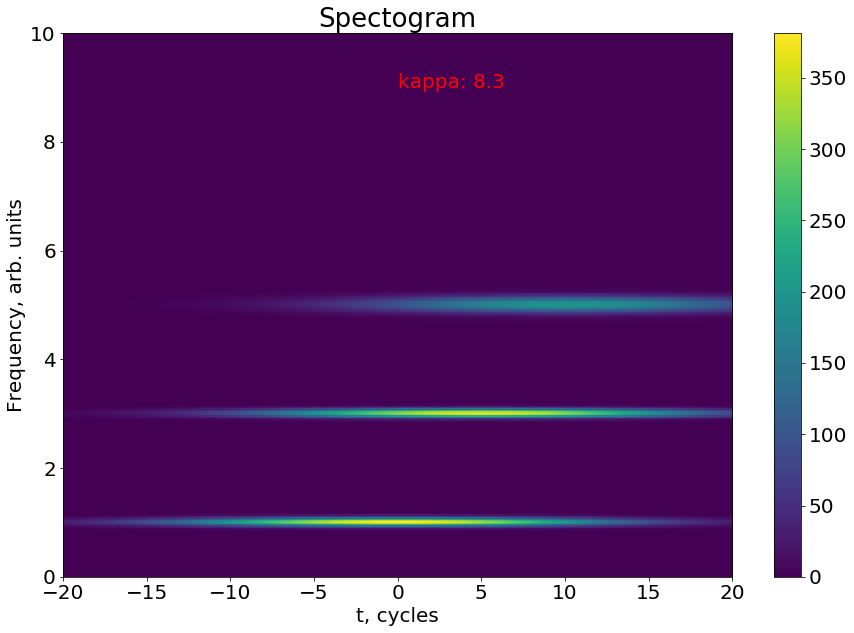

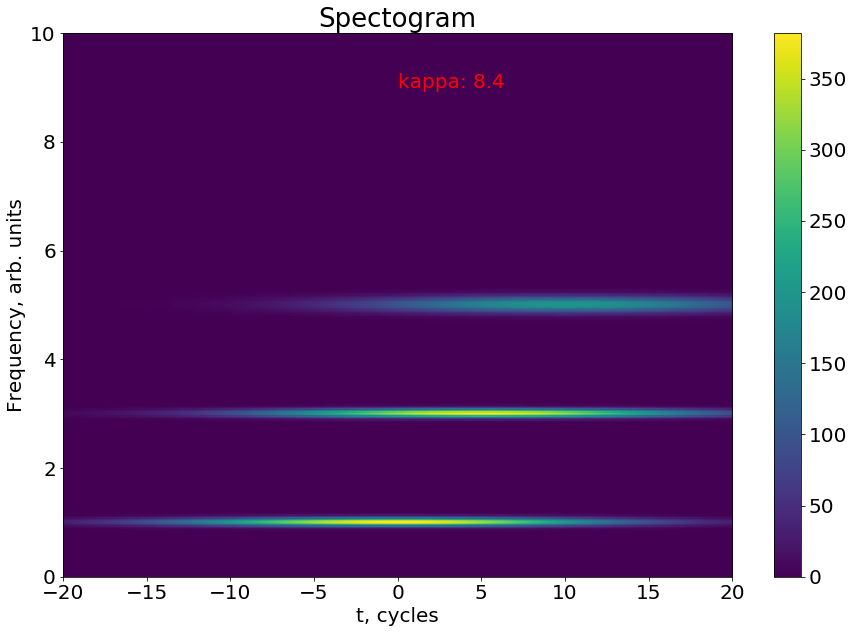

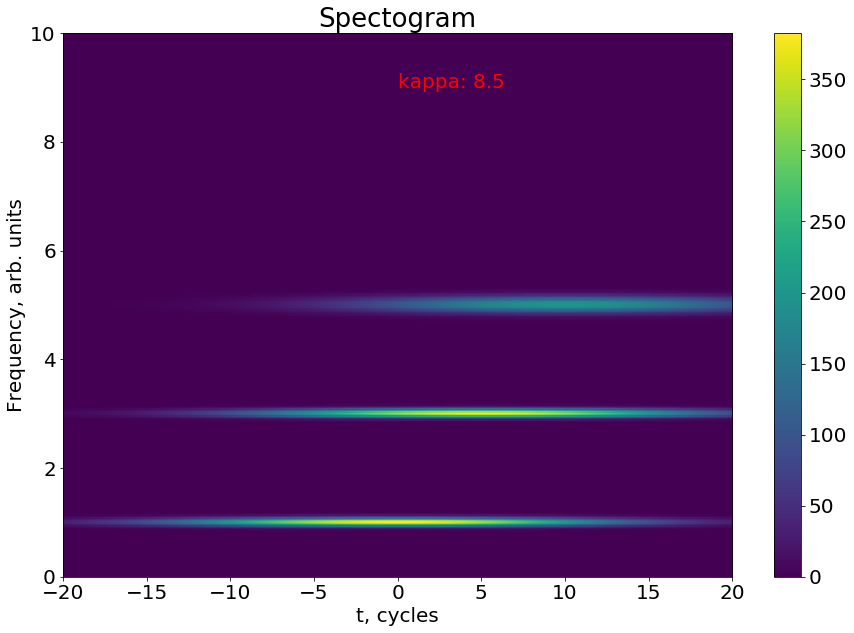

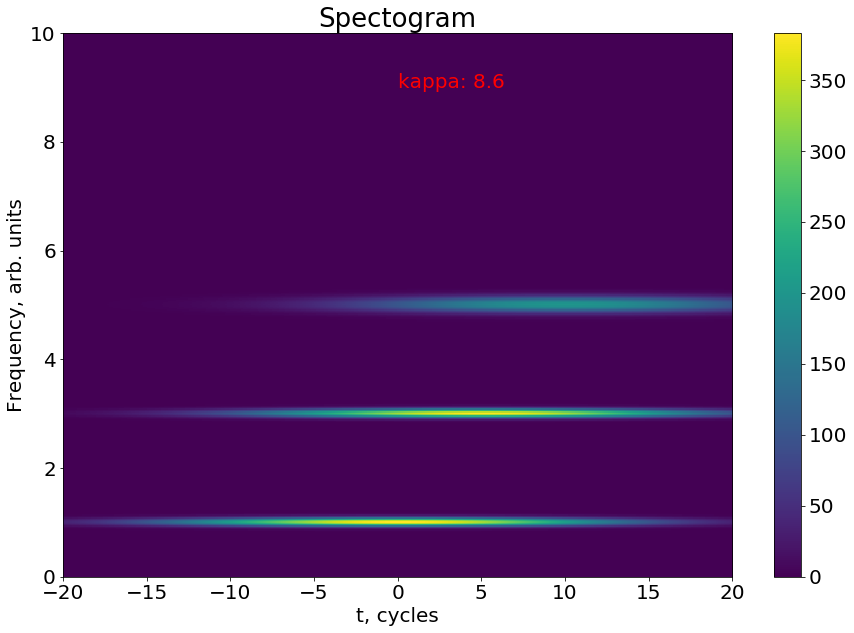

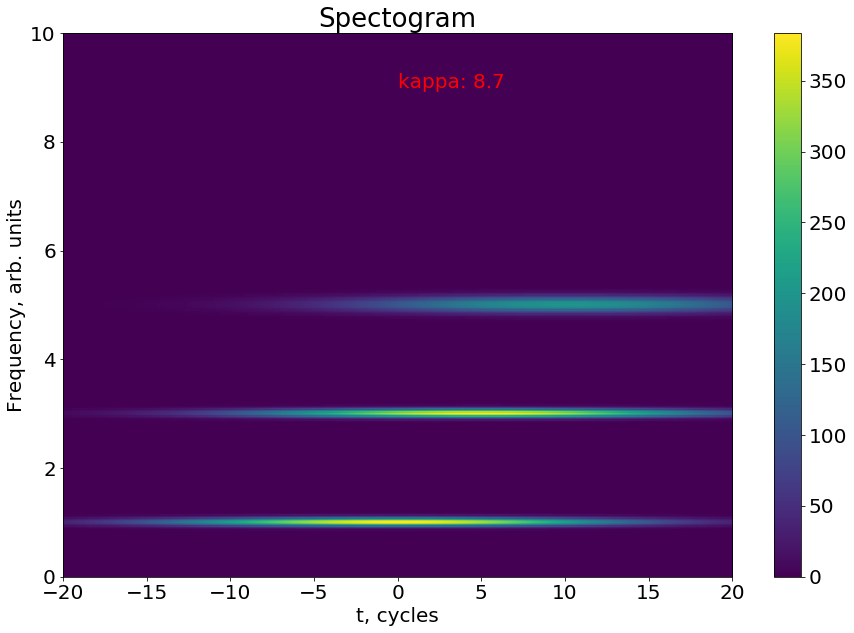

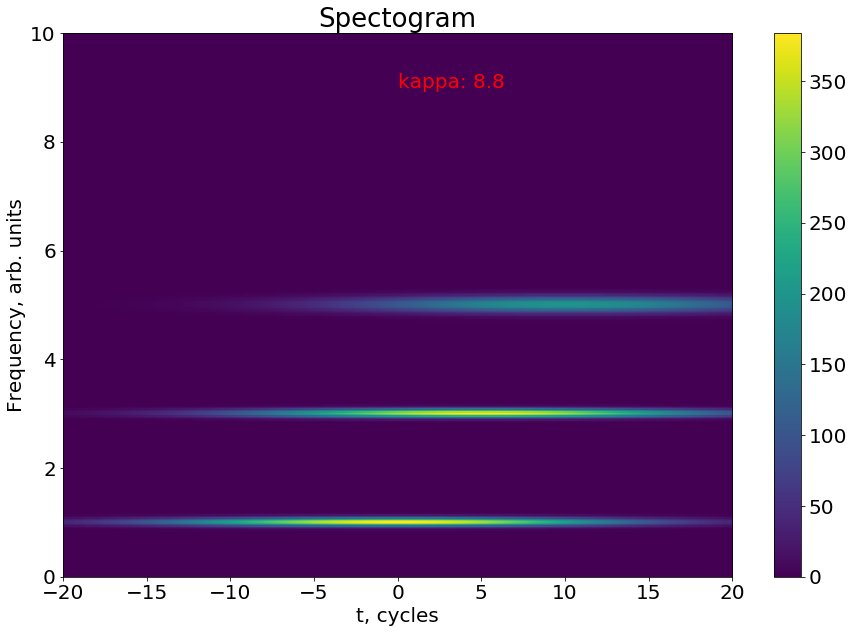

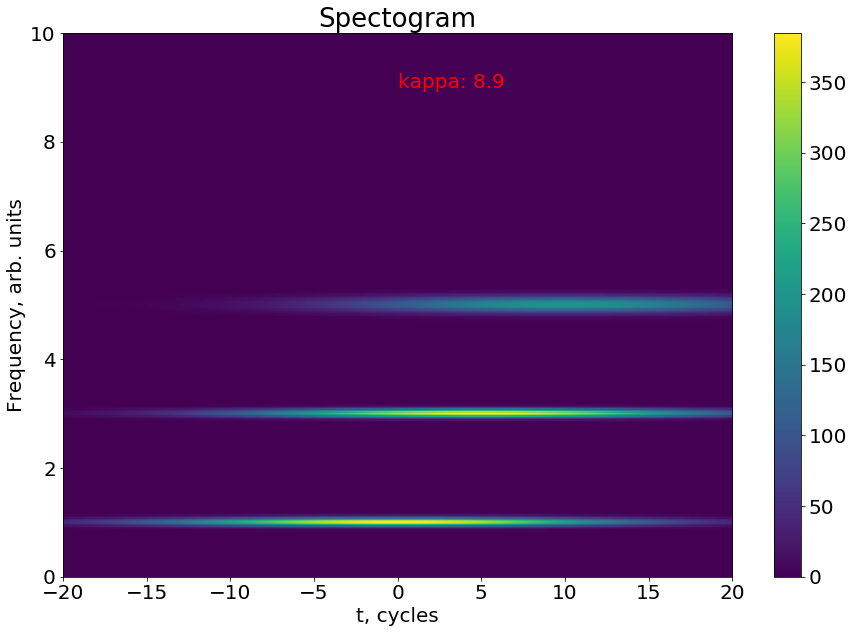

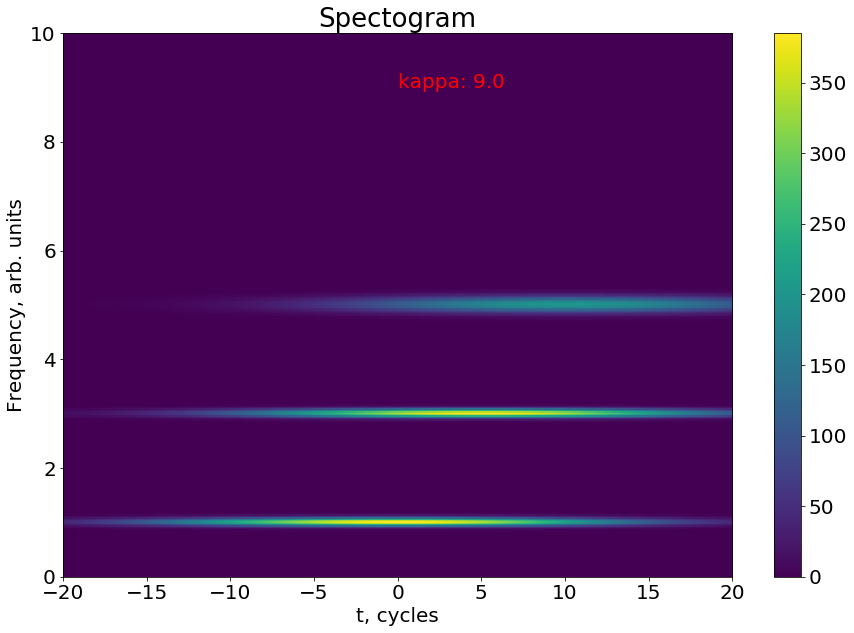

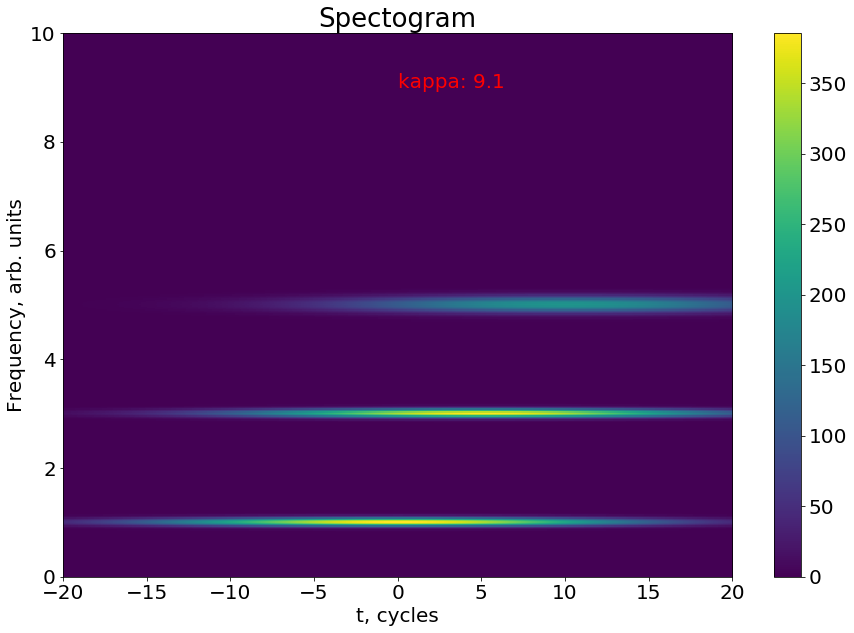

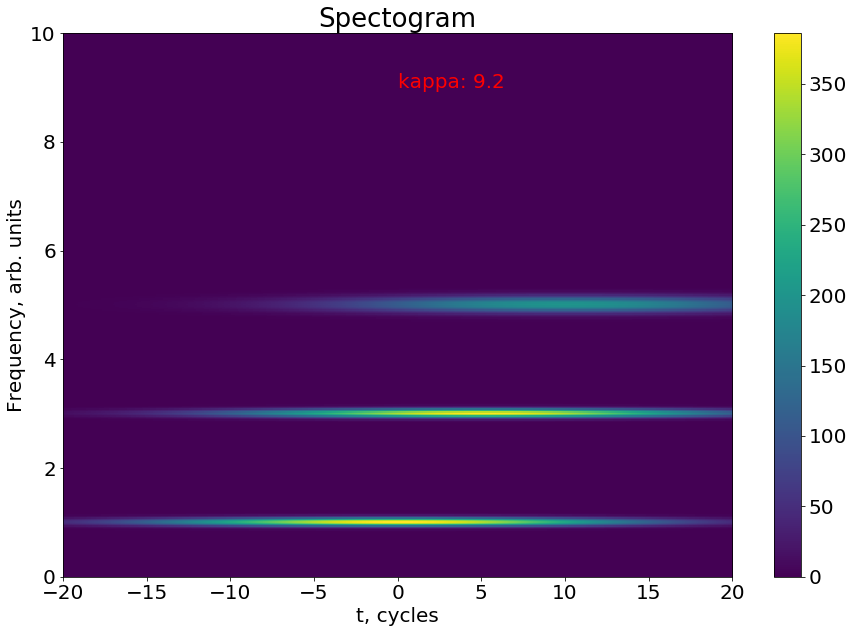

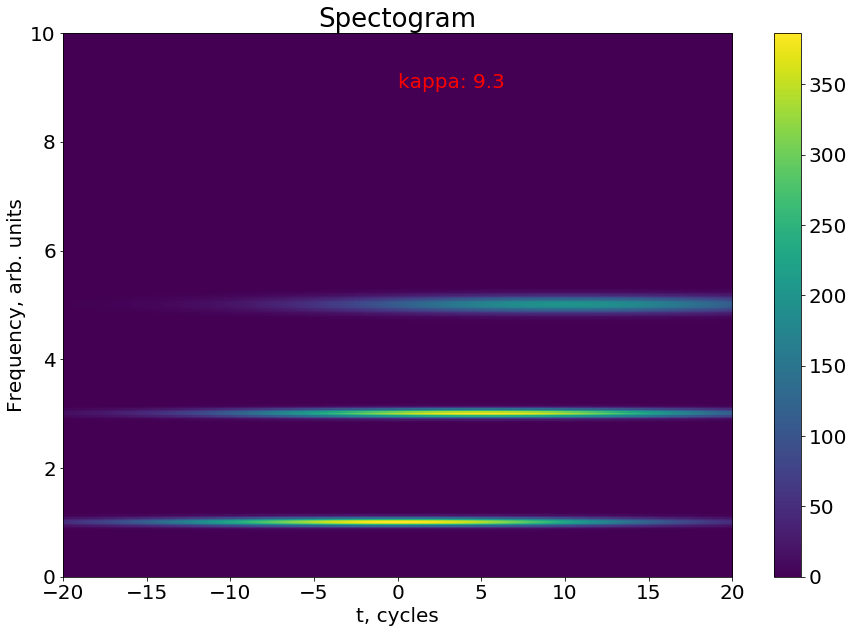

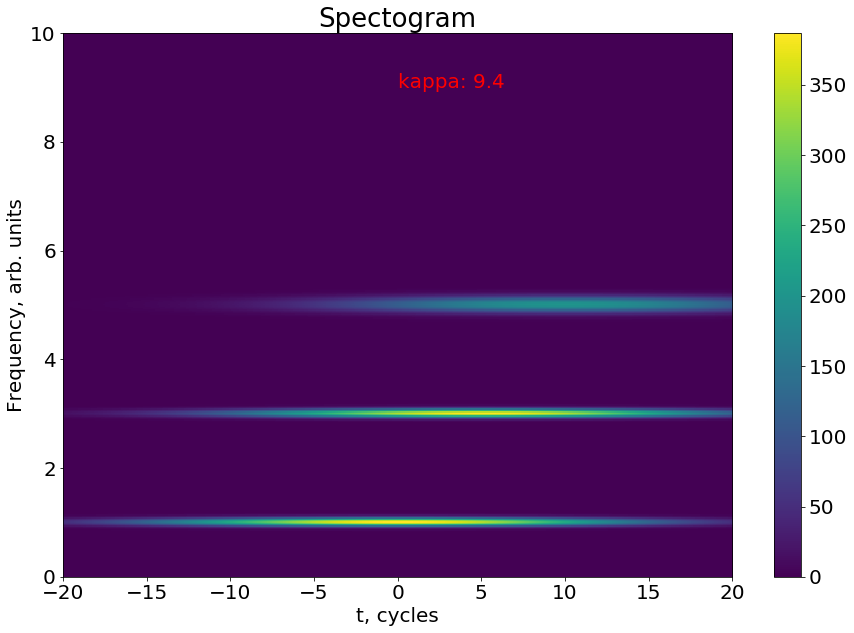

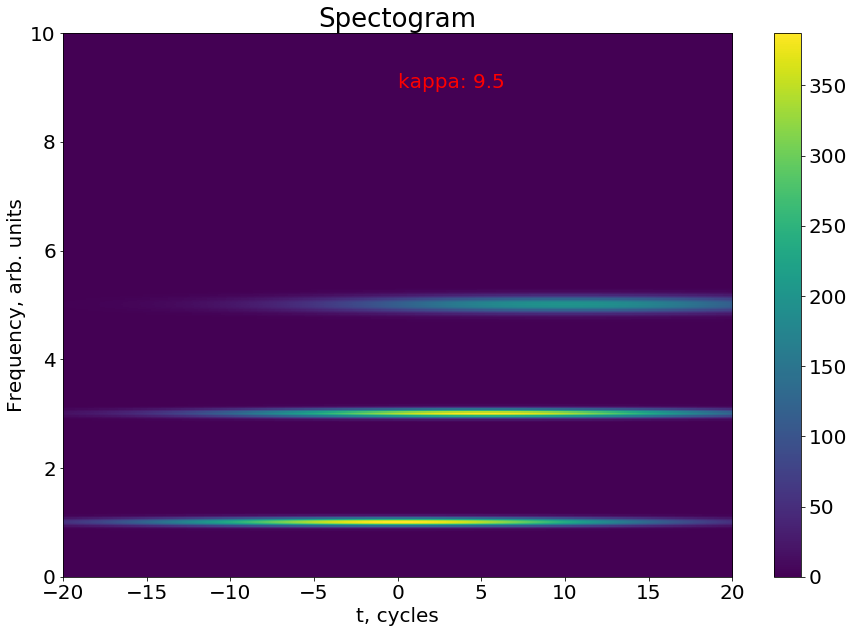

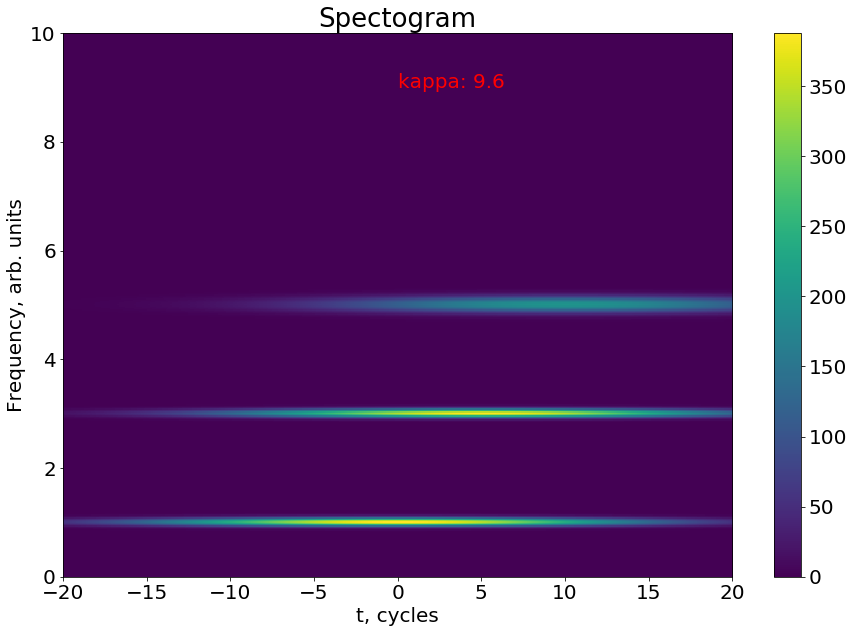

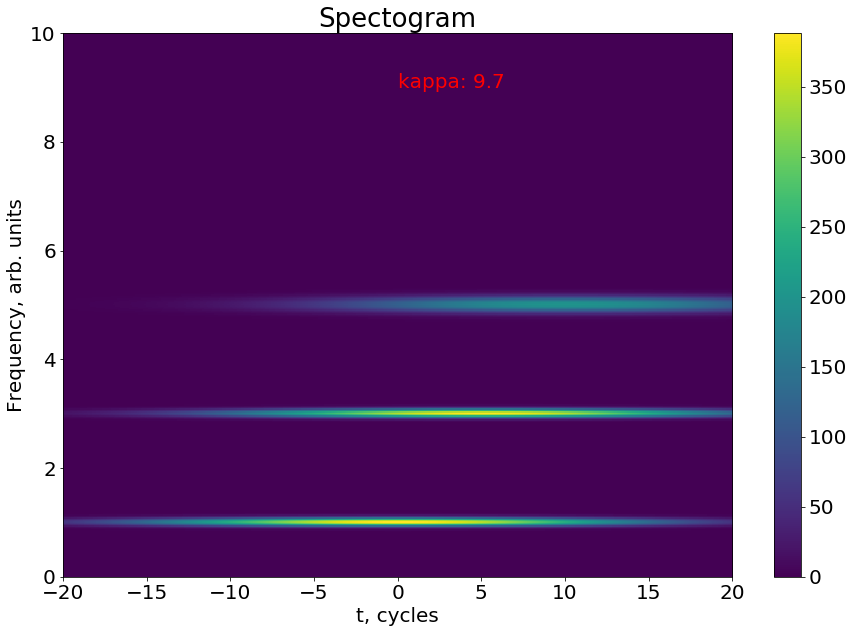

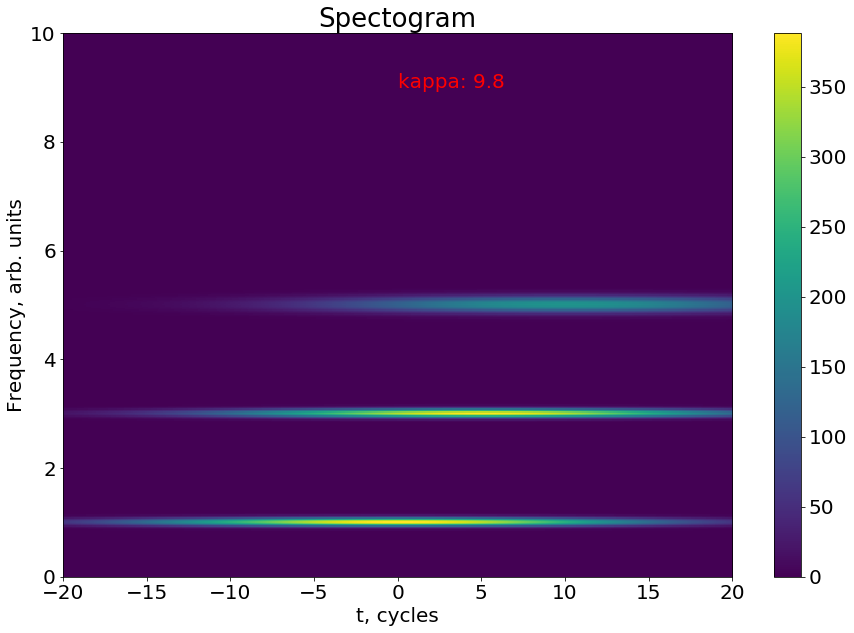

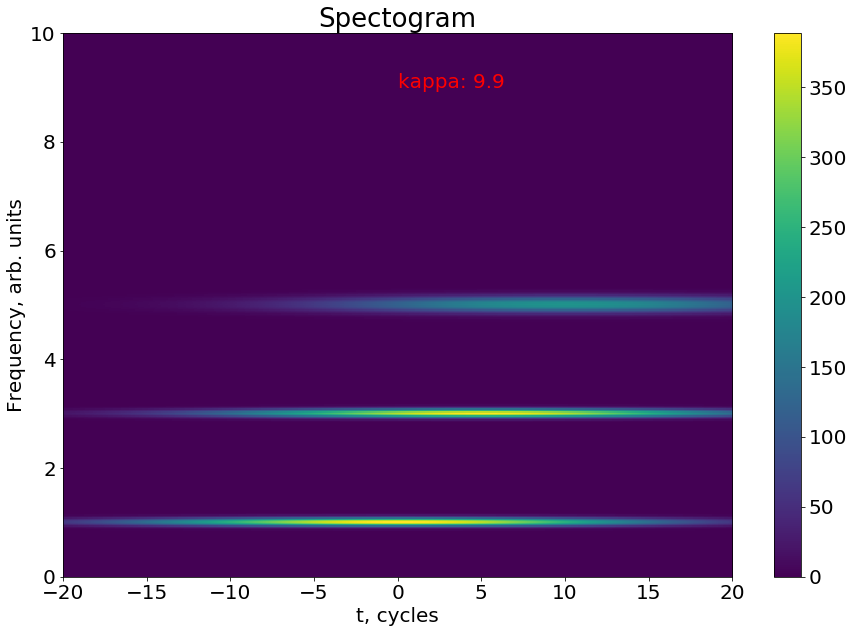

In [98]:
%%time

gif_images = []
for kappa in [i / 10 for i in range(100)]:
    window_width_given = kappa * 2 * pi
    nwindowsteps_given = 1000
    
    my_imsave(t, w, get_specgram(window_width = window_width_given,
                             nwindowsteps = nwindowsteps_given), 
          title = "Spectogram", 
          xlabel = "t, cycles", 
          ylabel = "Frequency, arb. units",
          k = kappa)
    
    gif_images.append(imageio.imread('spectrogram.png'))

imageio.mimsave('spectrogram.gif', gif_images)

In [110]:
from IPython.display import HTML
HTML('<img src="spectrogram.gif"/>')

## cProfile the code

* Vary $\operatorname{n\_timestamps\_given} = \overline{4090, \, 5000}$, write down results in this markdown and explain why cProfiler gives different results. What is bottleneck in this program? How can you improve the program?

In [22]:
window_width_given = 1 * 2 * pi
nwindowsteps_given = 1000
repetitions_given = 100

n_timestamps_given = 4096

t, y = form_signal(n_timestamps = n_timestamps_given)

In [23]:
cProfile.run('repeat_function(   window_width = ' + str(window_width_given) + ',' +
                                'nwindowsteps = ' + str(nwindowsteps_given) + ',' +
                                'repetitions  = ' + str(repetitions_given ) +       ')' )

         803704 function calls (803404 primitive calls) in 14.523 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.000    0.000    0.003    0.000 <__array_function__ internals>:2(any)
      100    0.000    0.000    0.009    0.000 <__array_function__ internals>:2(linspace)
      100    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(ndim)
      100    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(result_type)
   100000    7.052    0.000    7.052    0.000 <ipython-input-20-5c5c0547a085>:1(window_function)
        1    0.000    0.000   14.523   14.523 <ipython-input-20-5c5c0547a085>:18(repeat_function)
      100    1.637    0.016   14.522    0.145 <ipython-input-20-5c5c0547a085>:5(get_specgram)
        1    0.000    0.000   14.523   14.523 <string>:1(<module>)
      200    0.000    0.000    0.001    0.000 _asarray.py:88(asanyarray)
   100000    0.073    0.000    0.105    0.00

## cProfile parts of code
### * Wrap the following markdowns as $\mathbf{def}\:\:\: \mathit{plot\_specgram(\dots)}\:\:\: \:\:\: $ and as $\:\:\: \:\:\: \mathbf{def}\:\:\: \mathit{compute\_specgram(\dots)}$: ![Image_1.png](Image_1.png) 
![Image_3.png](Image_3.png)

### * Use, for example, $\mathit{time()}$ for your own profiling, by using, e.g., $\mathit{from\: time\: import\: time}$.
### * Vary $\operatorname{n\_timestamps\_given}$ and (by using, e.g., $\mathit{time()}$) calulate computational time expended on $\mathit{plot\_specgram(\dots)}$ ($=t_{plot}(nwindowsteps\_given)$) and $\mathit{compute\_specgram(\dots)}$ ($=t_{compute}(nwindowsteps\_given)$) and ratios $\frac{t_{plot}(nwindowsteps\_given)}{t_{total}(n\_timestamps\_given)}$ $\frac{t_{compute}(nwindowsteps\_given)}{t_{total}(nwindowsteps\_given)}$, where $t_{total}(nwindowsteps\_given)$ is total computational time of program in for each $n\_timestamps\_given$
### * Plot the graphs of the ratios versus $\mathit{nwindowsteps\_given}$, label axises and title.

In [112]:
def my_plofiler(func):
    import time
    def wrapper(*args, **kwargs):
        t = time.clock()
        res = func(*args, **kwargs)
        print(func.__name__, time.clock() - t)
        return res
    return wrapper

In [125]:
# @my_plofiler
def plot_specgram(nwindowsteps_given, spectogrm):
    kappa = 1
    window_width_given = kappa * 2 * pi
    
    my_imshow(t, w, get_specgram(window_width = window_width_given,
                                 nwindowsteps = nwindowsteps_given), 
              title = "Specgram", 
              xlabel = "t, cycles", 
              ylabel = "Frequency, arb. units")
    # clim(0,0.5)
    plt.ylim(0, 10)
    plt.show()

In [126]:
# @my_plofiler
def compute_specgram(n_timestamps_given=4096, nwindowsteps_given=1000):
    window_width_given = 1 * 2 * pi    
    repetitions_given = 100
    
    t, y = form_signal(n_timestamps = n_timestamps_given)
    return get_specgram(window_width=window_width_given, nwindowsteps=1000)

In [134]:
def total_specgram(n_timestamps_given=4096, nwindowsteps_given=1000):
    t1 = time.clock()
    spgr = compute_specgram(n_timestamps_given=n_timestamps_given, nwindowsteps_given=nwindowsteps_given)
    t2 = time.clock()
    plot_specgram(nwindowsteps_given=nwindowsteps_given, spectogrm=spgr)
    t3 = time.clock()
    
    return t2 - t1, t3 - t2

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


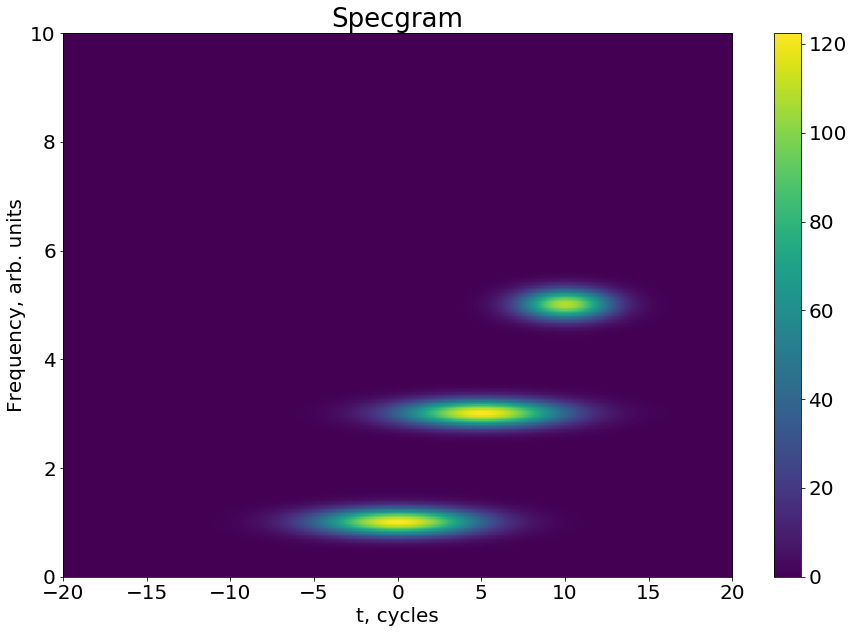

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


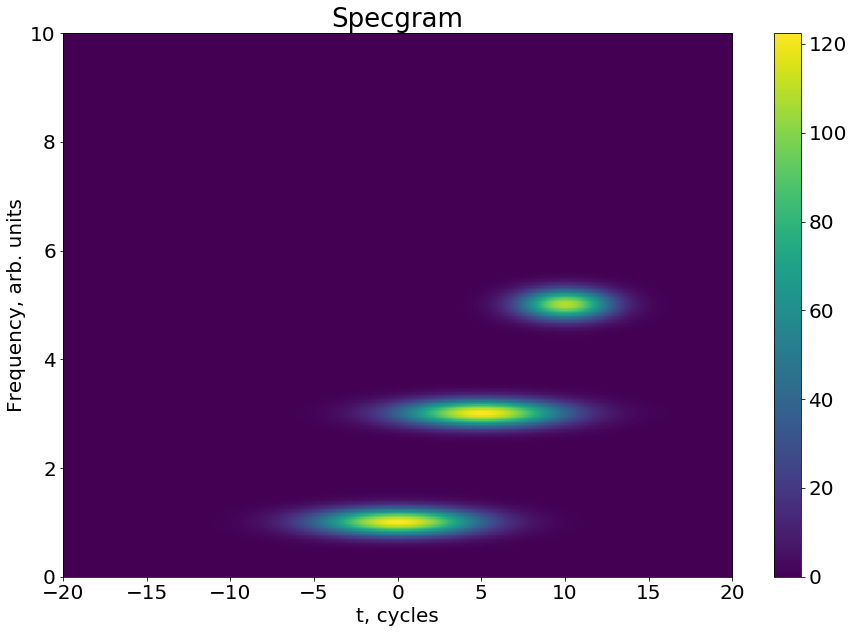

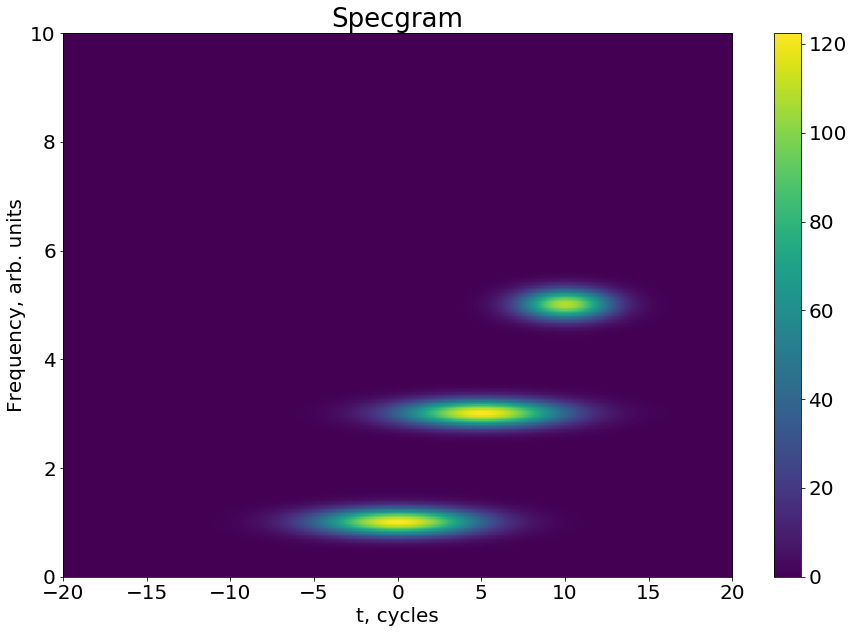

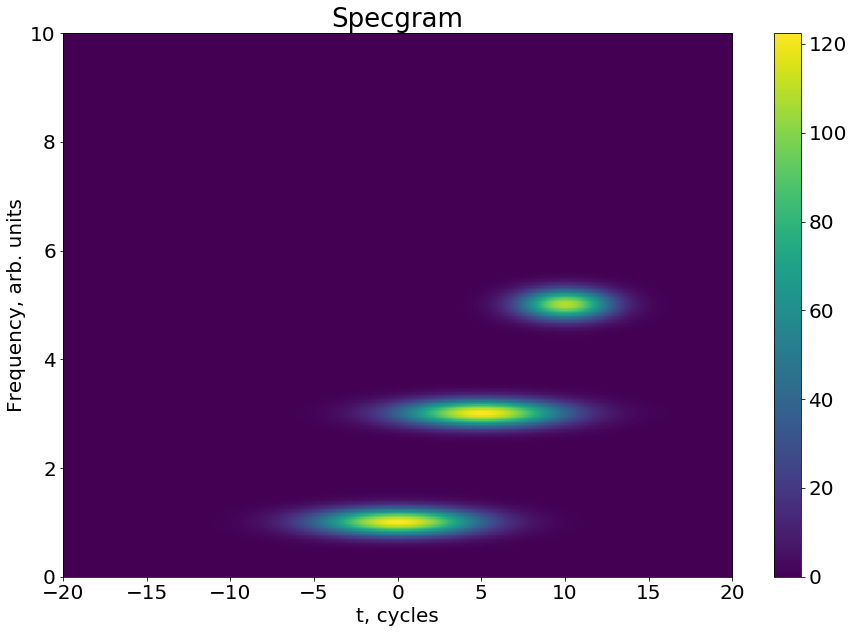

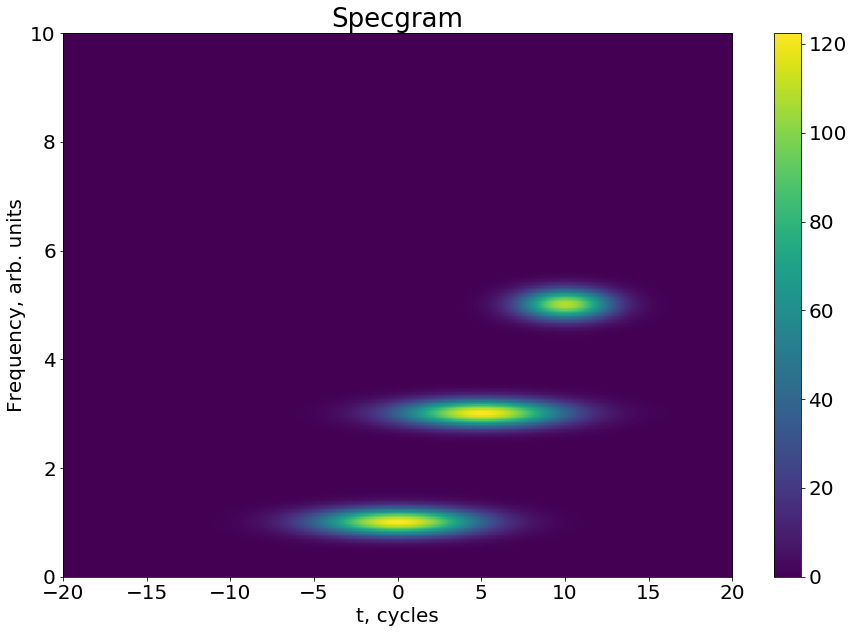

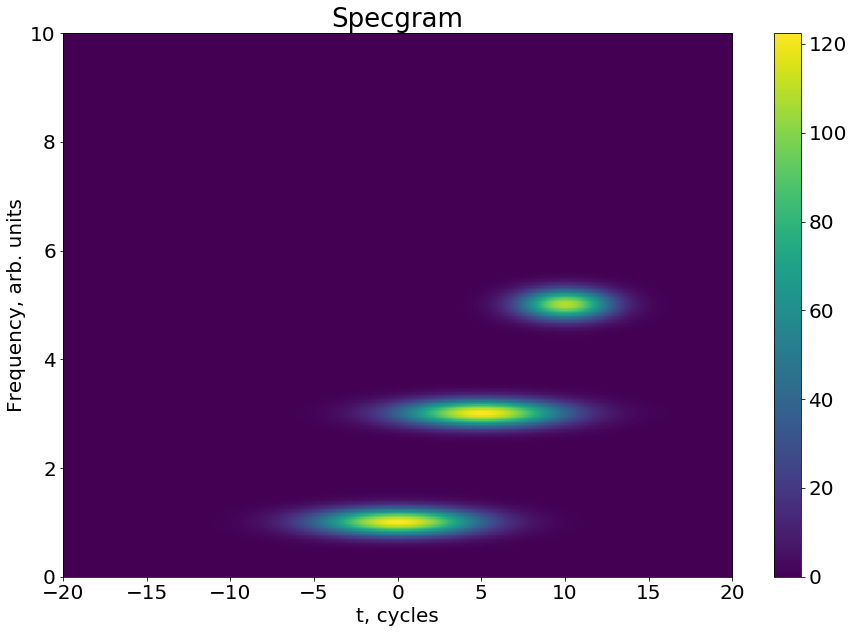

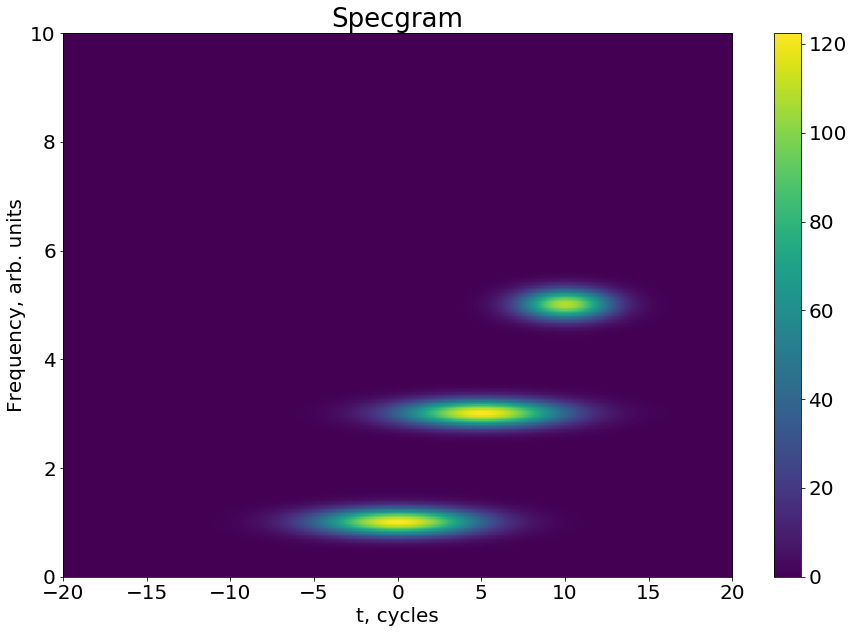

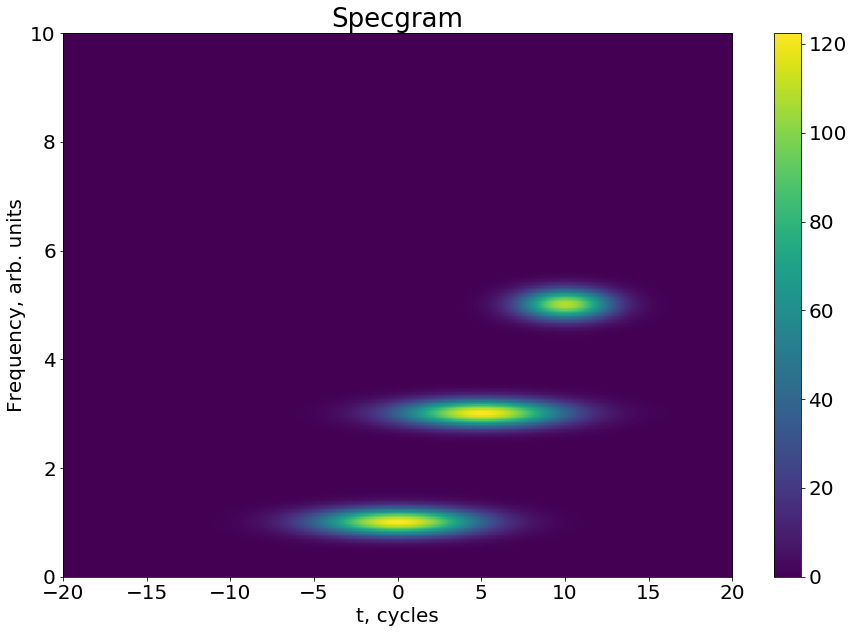

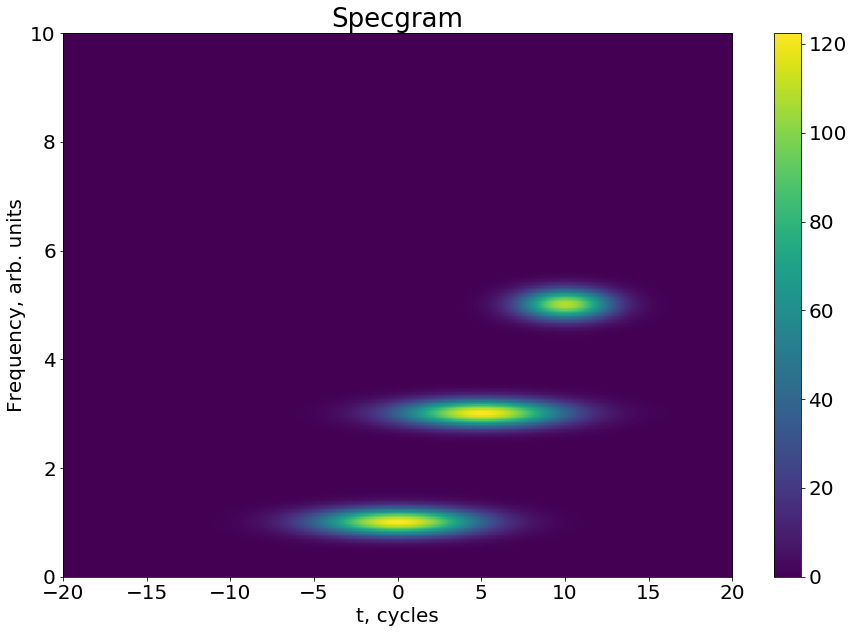

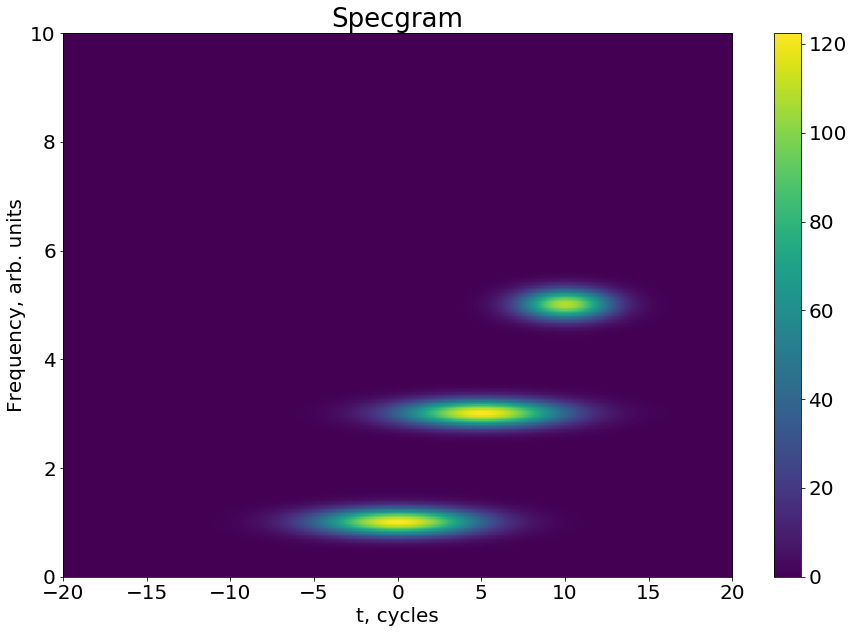

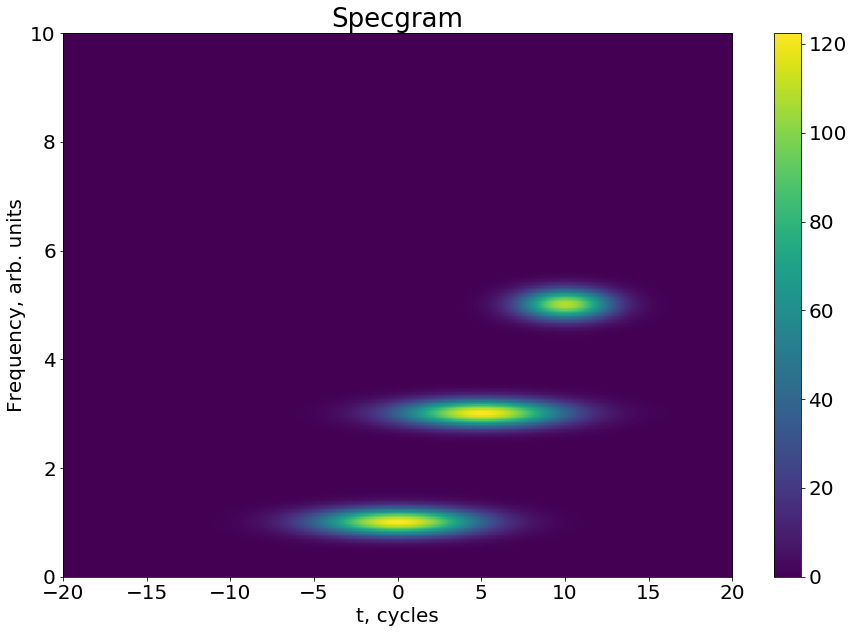

In [162]:
comp_time = []
plot_time = []

for i in [4090 + t for t in range(11)]:
    ct, pt = total_specgram(n_timestamps_given=i, nwindowsteps_given=1000)
    comp_time.append(ct)
    plot_time.append(pt)    

In [163]:
total_time = [comp_time[i] + plot_time[i] for i in range(len(comp_time))]

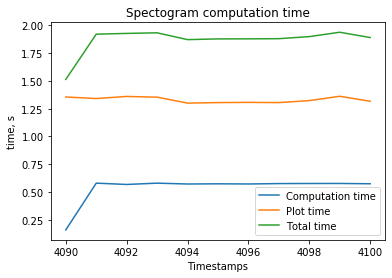

In [155]:
plt.plot([4090 + t for t in range(11)], comp_time, label=('Computation time'))
plt.plot([4090 + t for t in range(11)], plot_time, label=('Plot time'))
plt.plot([4090 + t for t in range(11)], total_time, label=('Total time'))
plt.title('Spectogram computation time')
plt.xlabel('Timestamps')
plt.ylabel('time, s')
plt.legend()
plt.show()

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


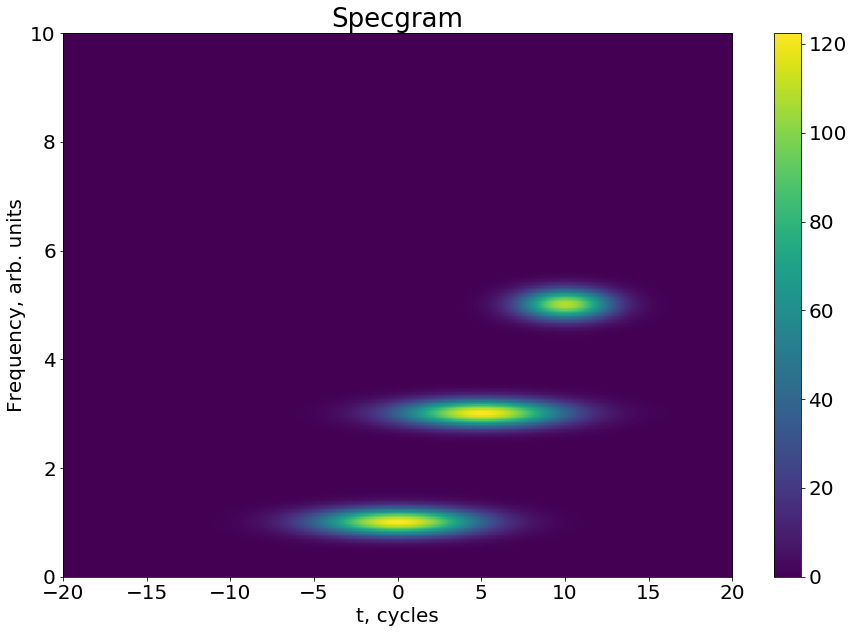

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


         289033 function calls (283069 primitive calls) in 0.680 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       64    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
      875    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(amax)
      870    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(amin)
      636    0.000    0.000    0.007    0.000 <__array_function__ internals>:2(any)
      260    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(around)
       37    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
       30    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
      141    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(broadcast_arrays)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
       70    0.000    0.000    

        4    0.000    0.000    0.000    0.000 encoder.py:104(__init__)
        4    0.000    0.000    0.000    0.000 encoder.py:182(encode)
        4    0.000    0.000    0.000    0.000 encoder.py:204(iterencode)
        3    0.000    0.000    0.000    0.000 figure.py:100(_entry_from_axes)
        3    0.000    0.000    0.000    0.000 figure.py:101(<dictcomp>)
        2    0.000    0.000    0.000    0.000 figure.py:1072(_make_key)
        2    0.000    0.000    0.000    0.000 figure.py:1075(fixitems)
        3    0.000    0.000    0.000    0.000 figure.py:108(bubble)
        2    0.000    0.000    0.000    0.000 figure.py:1091(fixlist)
        2    0.000    0.000    0.000    0.000 figure.py:1102(_process_projection_requirements)
        2    0.000    0.000    0.000    0.000 figure.py:115(add)
        2    0.000    0.000    0.024    0.012 figure.py:1261(add_subplot)
        2    0.000    0.000    0.000    0.000 figure.py:1418(_add_axes_internal)
       19    0.000    0.000    0.000    0

      346    0.000    0.000    0.001    0.000 transforms.py:2375(transform_non_affine)
        8    0.000    0.000    0.000    0.000 transforms.py:2385(transform_path_non_affine)
  422/361    0.001    0.000    0.005    0.000 transforms.py:2395(get_affine)
       48    0.000    0.000    0.000    0.000 transforms.py:2415(__init__)
       48    0.000    0.000    0.000    0.000 transforms.py:2459(get_matrix)
      399    0.000    0.000    0.002    0.000 transforms.py:2470(composite_transform_factory)
       45    0.000    0.000    0.000    0.000 transforms.py:2553(__init__)
  269/267    0.000    0.000    0.000    0.000 transforms.py:2573(get_matrix)
        2    0.000    0.000    0.000    0.000 transforms.py:2616(__init__)
       43    0.000    0.000    0.000    0.000 transforms.py:2632(get_matrix)
      195    0.000    0.000    0.001    0.000 transforms.py:2654(__init__)
      332    0.000    0.000    0.000    0.000 transforms.py:2668(get_matrix)
       44    0.000    0.000    0.000    0.

In [160]:
cProfile.run('total_specgram(n_timestamps_given=4090, nwindowsteps_given=1000)')

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


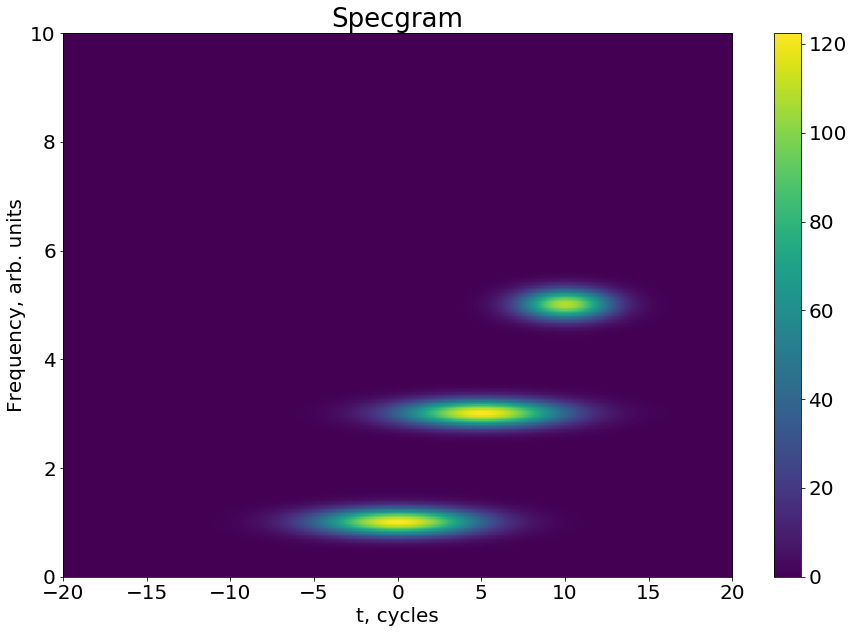

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


         289035 function calls (283071 primitive calls) in 0.690 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       64    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(all)
      875    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(amax)
      870    0.000    0.000    0.005    0.000 <__array_function__ internals>:2(amin)
      636    0.000    0.000    0.006    0.000 <__array_function__ internals>:2(any)
      260    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(around)
       37    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
       30    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
      141    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(broadcast_arrays)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
       70    0.000    0.000    

       30    0.000    0.000    0.000    0.000 core.py:3161(__getitem__)
       16    0.000    0.000    0.000    0.000 core.py:3178(_scalar_heuristic)
      176    0.000    0.000    0.000    0.000 core.py:3347(dtype)
       44    0.000    0.000    0.000    0.000 core.py:3363(shape)
        2    0.000    0.000    0.000    0.000 core.py:3367(shape)
        8    0.000    0.000    0.000    0.000 core.py:3446(mask)
        4    0.000    0.000    0.000    0.000 core.py:3541(shrink_mask)
        3    0.000    0.000    0.000    0.000 core.py:356(maximum_fill_value)
       79    0.000    0.000    0.000    0.000 core.py:3577(_get_data)
        2    0.000    0.000    0.000    0.000 core.py:3607(fill_value)
        9    0.000    0.000    0.000    0.000 core.py:3663(filled)
        3    0.000    0.000    0.000    0.000 core.py:3960(_delegate_binop)
        3    0.000    0.000    0.000    0.000 core.py:4098(__mul__)
        2    0.000    0.000    0.000    0.000 core.py:439(_check_fill_value)
        

      220    0.000    0.000    0.001    0.000 transforms.py:1748(frozen)
       44    0.000    0.000    0.000    0.000 transforms.py:1752(is_separable)
  546/543    0.001    0.000    0.002    0.000 transforms.py:1776(transform_affine)
      739    0.000    0.000    0.000    0.000 transforms.py:178(<lambda>)
       38    0.000    0.000    0.001    0.000 transforms.py:1783(transform_point)
      977    0.001    0.000    0.003    0.000 transforms.py:1819(__init__)
     1217    0.000    0.000    0.000    0.000 transforms.py:1857(get_matrix)
        2    0.000    0.000    0.000    0.000 transforms.py:1905(clear)
       92    0.001    0.000    0.002    0.000 transforms.py:1914(rotate)
       92    0.000    0.000    0.002    0.000 transforms.py:1930(rotate_deg)
       42    0.000    0.000    0.002    0.000 transforms.py:1950(rotate_deg_around)
       88    0.000    0.000    0.001    0.000 transforms.py:1962(translate)
      281    0.001    0.000    0.004    0.000 transforms.py:1976(scale)
   

In [161]:
cProfile.run('total_specgram(n_timestamps_given=4096, nwindowsteps_given=1000)')

Algorithm works faster if we have even number of timestamps